# NGC 2985 (UGC 5253)

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os
import scipy.interpolate as inter

%pylab
%matplotlib inline
%run ../../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N2985'
gtype = '(R)SA(r)ab' #TODO: откуда
incl = 37. #adopted by Noordermeer+08, LEDA - 37.9, Epinat+08 - 36.
scale = 0.091 #kpc/arcsec

data_path = '../../../data/ngc2985'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
# plt.rcParams['image.cmap'] = 'hsv'
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.get_cmap('hsv')(np.linspace(0, 1.0, 12)))

In [7]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

TODO: add

## Разное

In [8]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+2985&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [9]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc2985 width=1000 height=350></iframe>')

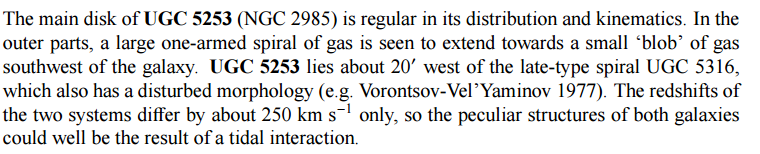

In [10]:
os.chdir(data_path)
Image('noordermeer_data/n2985_cite_p39.png')

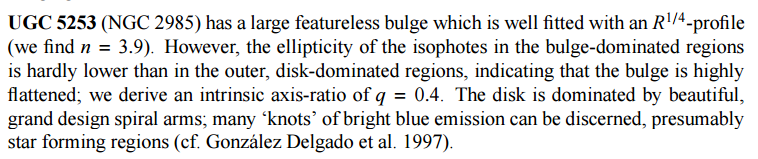

In [11]:
Image('noordermeer_data/n2985_cite_p110.png')

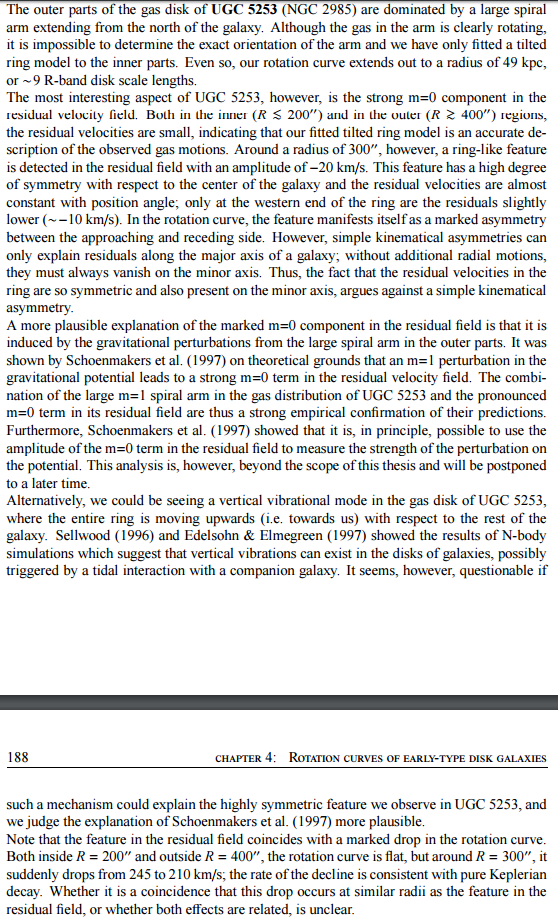

In [12]:
Image('noordermeer_data/n2985_cite_pp187_188.png')

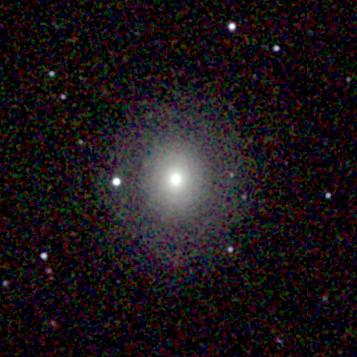

In [13]:
#2MASS
Image('ngc2985_JHK.jpg', width=300)

DSS картинка 10х10 arcmin:

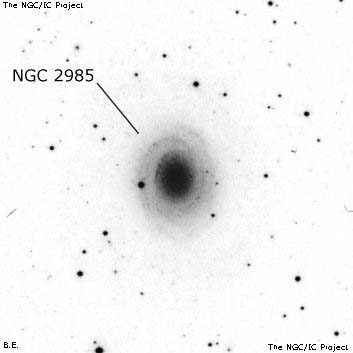

In [14]:
Image('n2985_DSS_10x10min.jpg')

Возможно картинка из Хаббла:

да, это действительно она в обработке - на Hubble Legacy Archive https://hla.stsci.edu/ вот в 
<a href='http://hla.stsci.edu//cgi-bin/moreinfo.cgi?html=1&dataset=hst_9788_17_acs_wfc_f814w_f658n&filename=hst_9788_17_acs_wfc_f814w%2Chst_9788_17_acs_wfc_f658n&level=4&spectral_elt=F814W%2FF658N&aperture=WFC1&mode=ACCUM&propid=9788&piname=Ho&detector=ACS/WFC&naxis=5977%205977&output_size=256&szoom=1.000000&hrcmatch=1&target=NGC2985&format=FITS&title=9788_17%20ACS%2FWFC%20F814W%2FF658N%20(color\)%20NGC2985&releasedate=1080952390&daocat=Loaded&sexcat=Loaded'>этом</a> снимке видно 

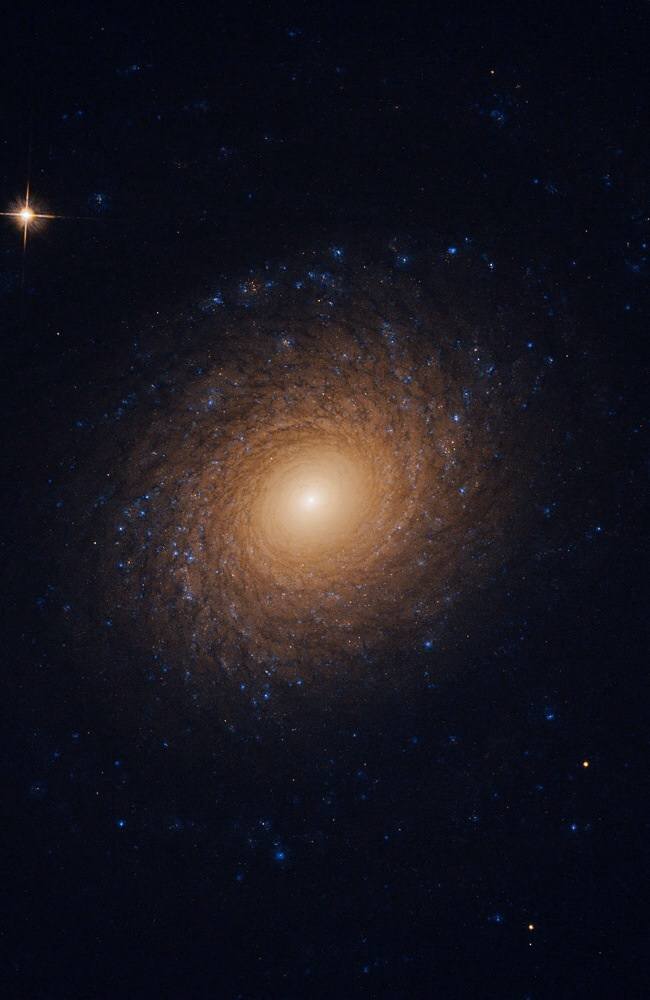

In [15]:
Image('n2985_hubble.jpg', width=300)

Извлеченная картинка самостоятельно:

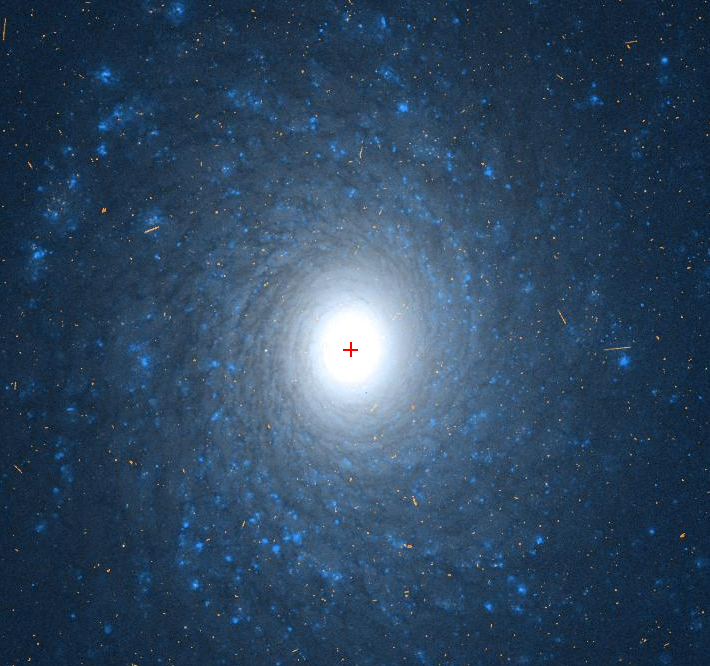

In [16]:
Image('HST_color.png')

Совмещенное с DSS изображение:

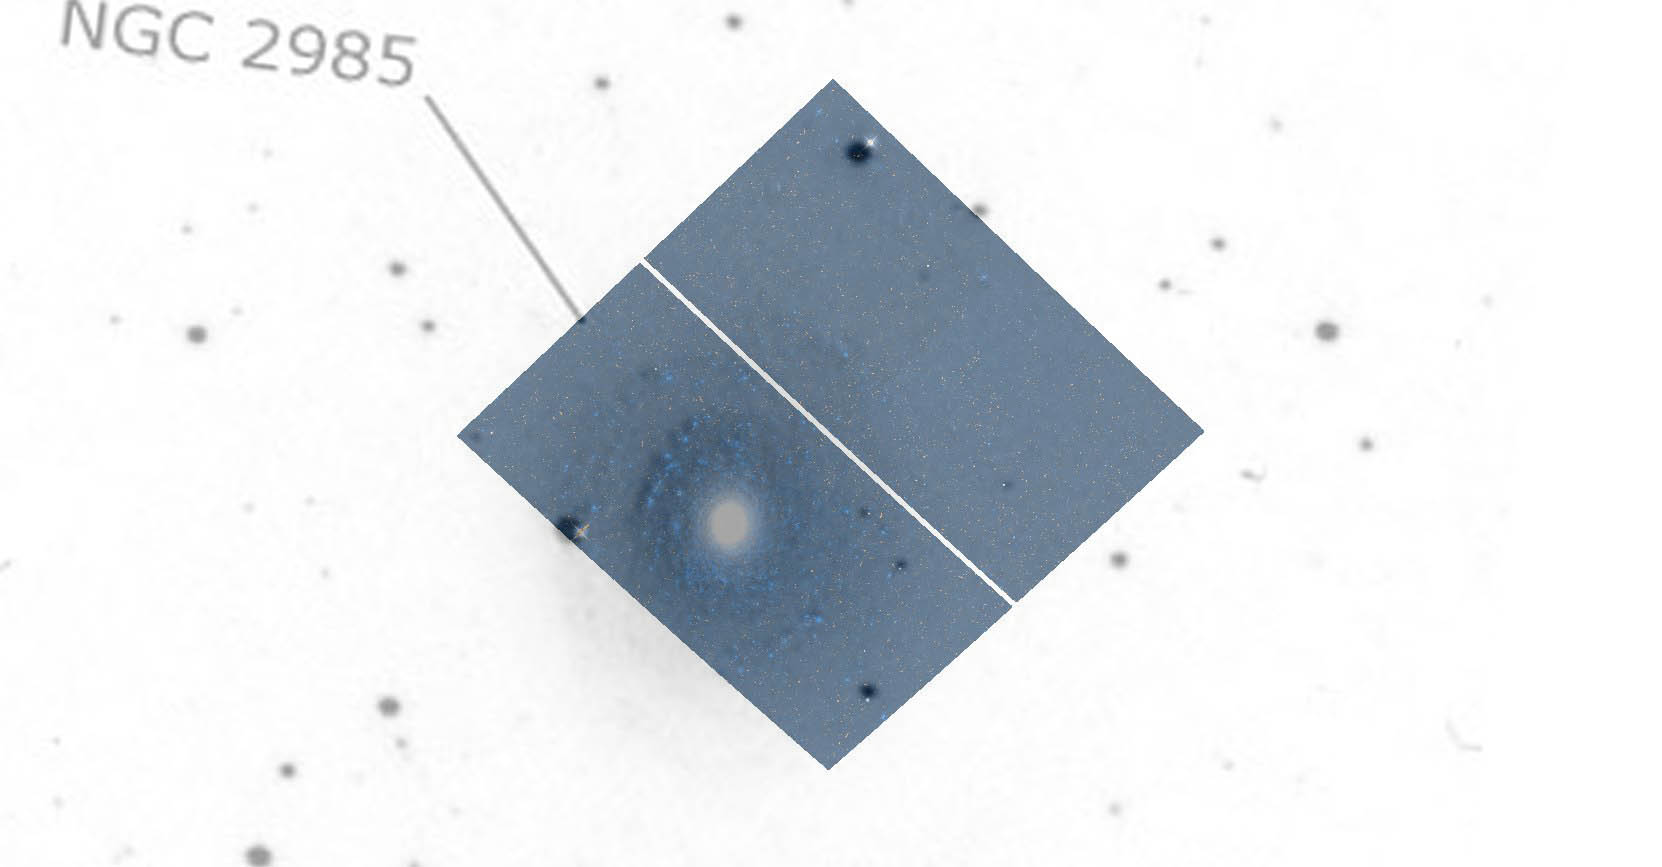

In [17]:
Image('hst_dss_combined.jpg')

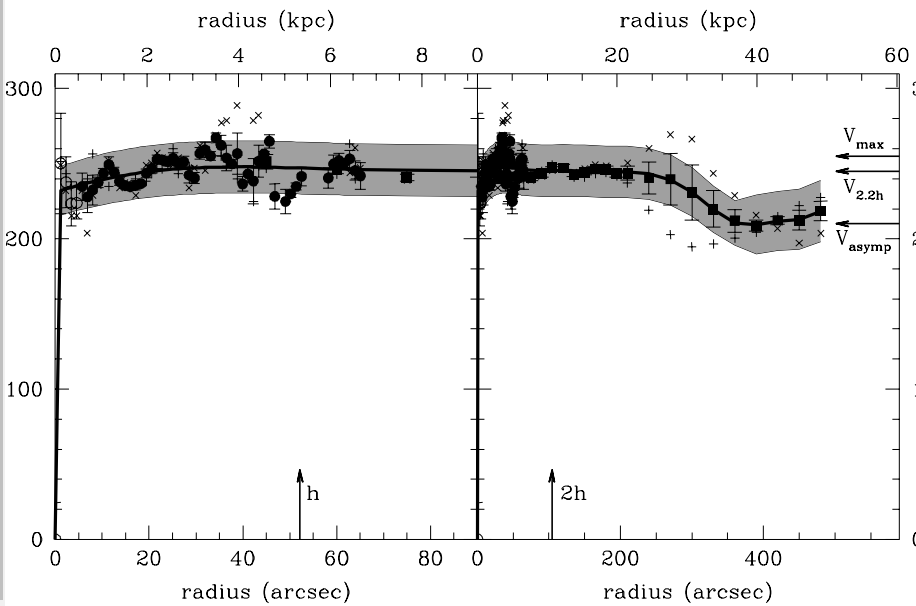

In [18]:
Image('noordermeer_data/n2985_rc.png')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


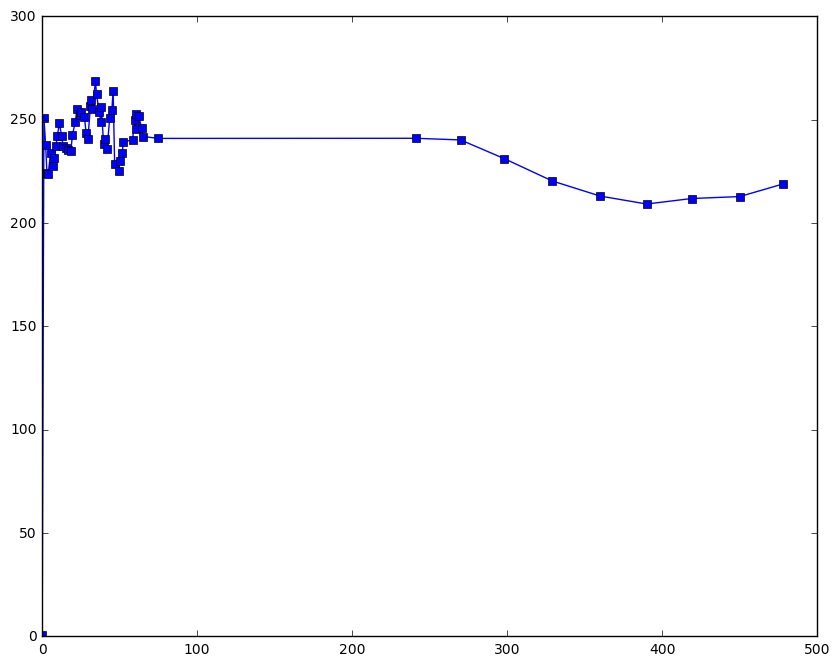

In [19]:
r, vel = zip(*np.loadtxt("noordermeer_data/n2985_rc_noorderm.dat", float, delimiter=','))

fig = plt.figure(figsize=[10,8])
plt.plot(r, vel, 's-')
plt.legend();

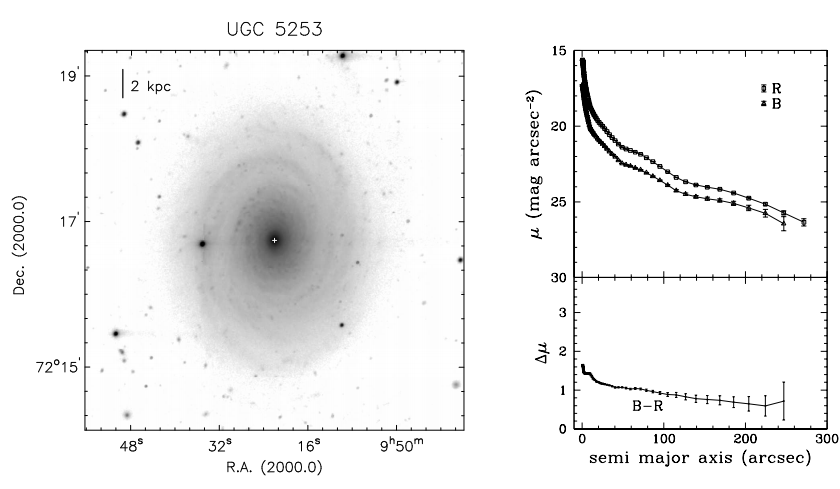

In [20]:
Image('noordermeer_data/n2985_photom.png')

## Кинематические данные по звездам

* HSM99 - дисперсии и скорости до ~35"
* Ноордермеер 2008 - дисперсии и скорости до 100" https://ui.adsabs.harvard.edu/#abs/2008MNRAS.388.1381N/abstract
* Gerssen 2000 https://arxiv.org/abs/astro-ph/0005454
* вот тут Dumas 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.379.1249D/abstract есть 20х20 секунд карты SAURON. 
А еще в ней есть карта дисперсий по газу:

TODO: add links and check exact values

TODO: extract $\sigma_g$ values

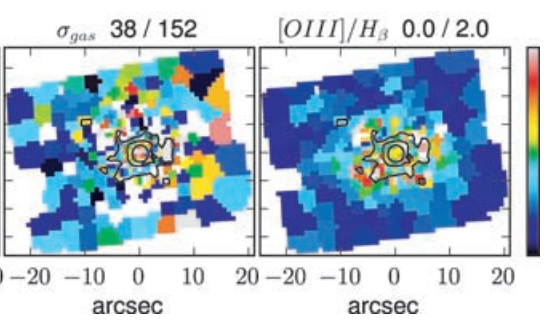

In [21]:
Image('Dumas_gas_disp.png')

### Кривая вращения

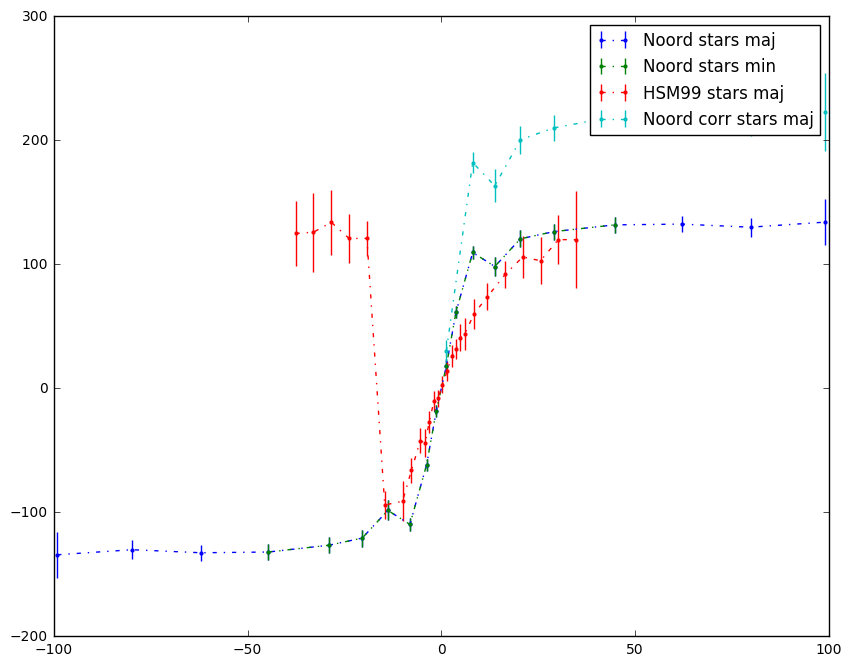

In [22]:
# Данные по звездной кинематике Noordermeer вдоль большей полуоси (не исправленные за наклон?)
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_ma.dat", float))

# Данные по звездной кинематике HSM99 вдоль большой полуоси (не исправленные за наклон)
r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm = zip(*np.loadtxt("v_stars_her.dat", float))

# Данные по звездной кинематике Noord вдоль большой полуоси (исправленные за наклон)
r_ma_n, vel_ma_n, e_vel_ma_n, sig_ma_n, e_sig_ma_n = zip(*np.loadtxt("v_stars_noord_1.dat", float))

# Данные по звездной кинематике Noordermeer вдоль малой полуоси (исправленные за наклон?)
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_mi.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.errorbar(r_mi, vel_mi, e_vel_mi, fmt='-.', marker='.', mew=0, label="Noord stars min")
plt.errorbar(r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 stars maj")
plt.errorbar(r_ma_n, vel_ma_n, e_vel_ma_n, fmt='-.', marker='.', mew=0, label="Noord corr stars maj")
plt.legend();

Малая ось точно не валидна, другие данные похожи. Перегнем:

In [23]:
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*sorted(zip(np.abs(r_ma), np.abs(vel_ma), e_vel_ma, sig_ma, e_sig_ma)))
r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm = zip(*sorted(zip(np.abs(r_ma_hsm), np.abs(vel_ma_hsm), e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm)))

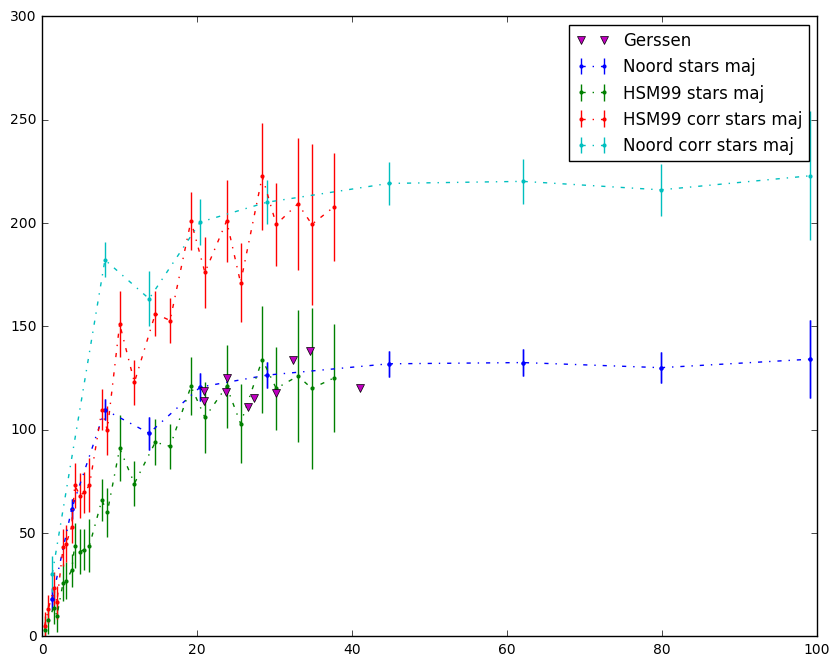

In [24]:
# Данные по звездной кинематике Gerssen вдоль большой полуоси (не исправленные за наклон?)
r_g, vel_g = zip(*np.loadtxt("gerssen_2000_vel.dat", float, delimiter=','))


fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.errorbar(r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 stars maj")
plt.errorbar(r_ma_hsm, map(lambda l: l/sin_i, vel_ma_hsm), e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 corr stars maj")
plt.errorbar(r_ma_n, vel_ma_n, e_vel_ma_n, fmt='-.', marker='.', mew=0, label="Noord corr stars maj")
plt.plot(r_g, vel_g, 'v', label='Gerssen')
plt.legend()
plt.ylim(0, 300);

Данные Герссена тоже хорошо ложатся.


TODO: проверить, что данные валидны (в работе Ноордермеера 2008 видно, что надо использовать верхнюю)

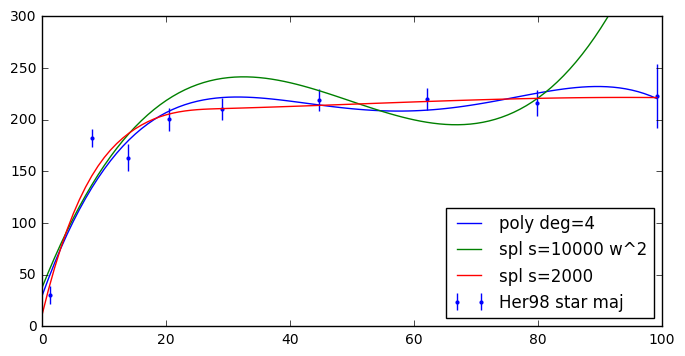

In [25]:
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma_n, vel_ma_n, yerr=e_vel_ma_n, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma_n), 100)

poly_star = poly1d(polyfit(r_ma_n, vel_ma_n, deg=4))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=4')

def w(arr):
    return map(lambda l: 1/(l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma_n, vel_ma_n, k=3, s=10000., w=w(e_vel_ma_n))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma_n, vel_ma_n, k=3, s=2000.)
plt.plot(test_points, spl(test_points), '-', label='spl s=2000')

plt.legend(loc='lower right')
plt.ylim(0, 300);

In [26]:
star_approx = spl

### Дисперсии

Прежде, чем оценивать, проведем несколько технических проверок.

Проверка 1: верно ли, что можно использовать дисперсии вдоль большой оси из v_stars_ma.dat вместо s_stars_maN.dat?

Можно,  но там точность хуже - лучше использовать вторые данные, ибо они в явном виде даны в статье (таблица 4) и снятые мной точки с графика лучше ложатся на данные s_stars_maN.dat.

Проверка 2: надо ли исправлять малую ось?

Да, надо - см. рисунок 5, там явно растянута малая полуось.

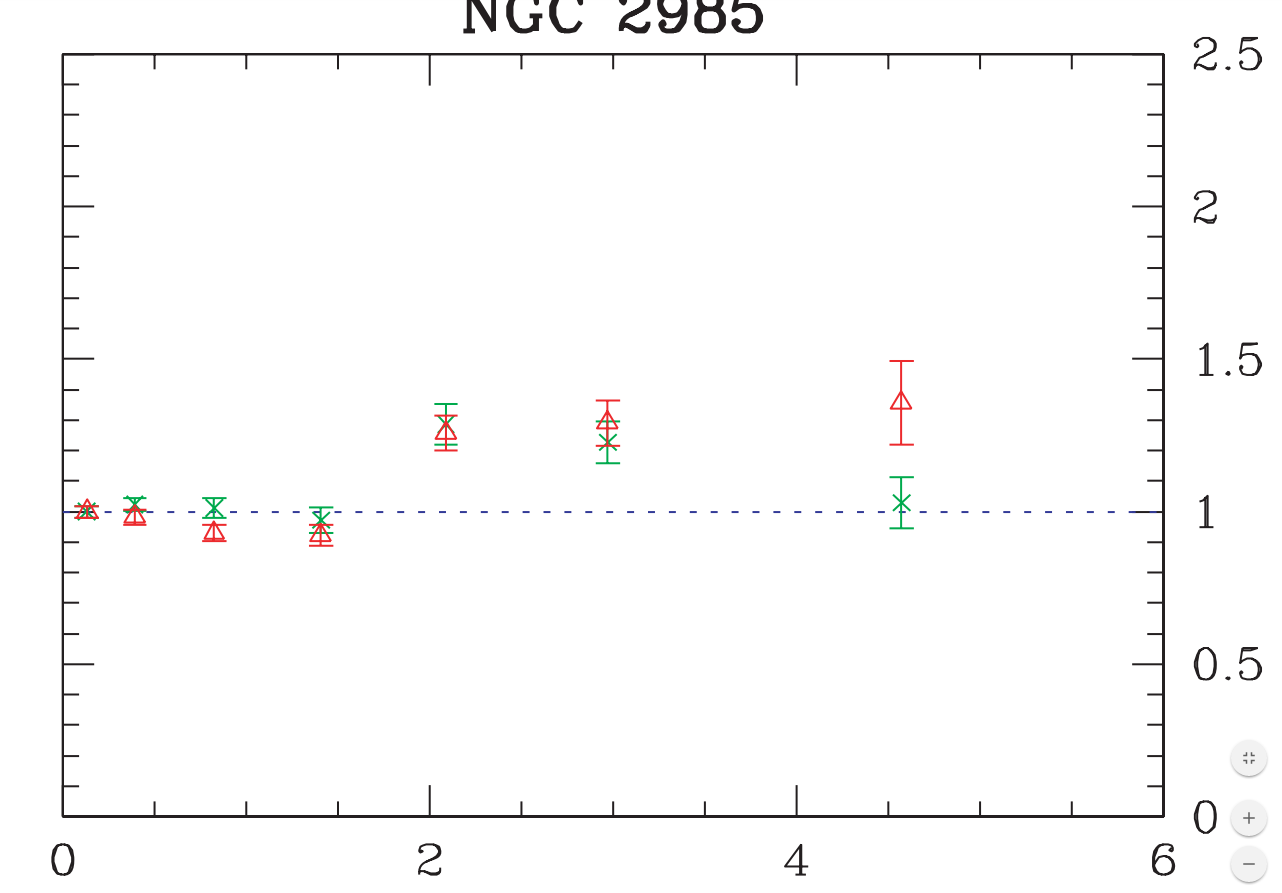

In [27]:
Image('noordermeer_data/n08_disp_ratio.png', width=400)

Также похоже, что в работе использовано немного другое значение масштаба - около 0.102 (выяснил эмпирически).

Для большой оси: $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj}  < \frac{\sigma_{maj}}{\sqrt{\sin^2 i + 0.49\cos^2 i}}< \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{maj}}{\sqrt{0.5\sin^2 i + 0.09\cos^2 i}} < \frac{\sqrt{2}\sigma_{maj}}{\sin i} (или \frac{\sigma_{maj}}{\sqrt{f}\sin i}),$$ 
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для малой оси: $\sigma^2_{min} = \sigma^2_{R}\sin^2 i + \sigma^2_{z}\cos^2 i$ и ограничения
$$\sigma_{min} < \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.49\cos^2 i}} < \sigma_R = \frac{\sigma_{min}}{\sqrt{\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.09\cos^2 i}} < \frac{\sigma_{min}}{\sin i}$$ 

Соответственно имеем 5 оценок из maj и 4 оценки из min.

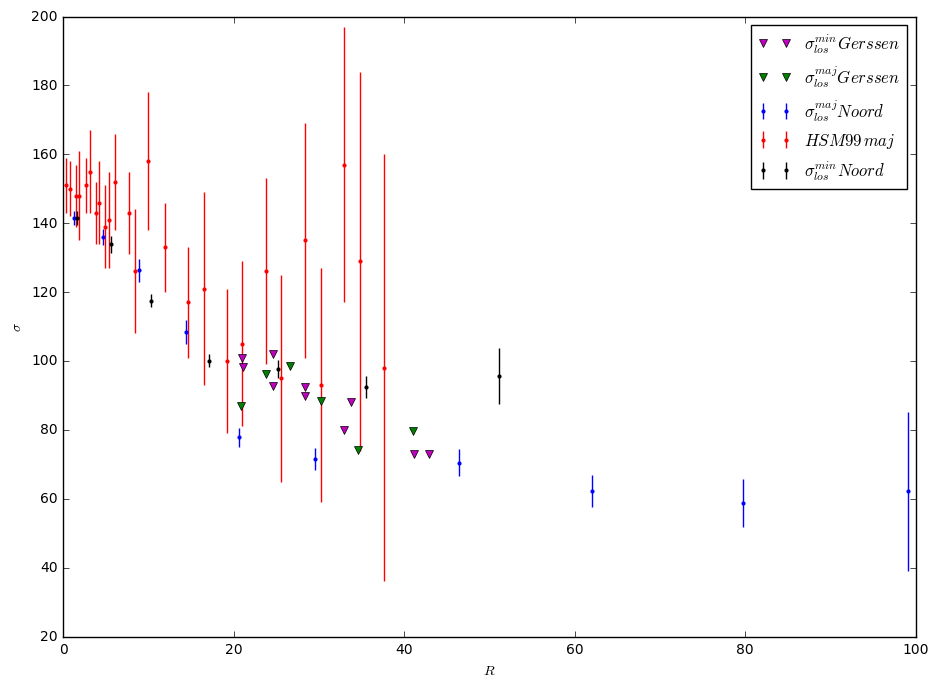

In [28]:
# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

r_sig_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("s_stars_maN.dat", float))
r_sig_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("s_stars_miN.dat", float))

#Данные Герссена по большой и малой оси (наверное уже раздвинутые)
r_sig_mi_g, sig_mi_g = zip(*np.loadtxt("gerssen_2000_sig_min.dat", float, delimiter=','))
r_sig_ma_g, sig_ma_g = zip(*np.loadtxt("gerssen_2000_sig_maj.dat", float, delimiter=','))

fig = plt.figure(figsize=[11, 8])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$\sigma_{los}^{maj} Noord$')
plt.errorbar(map(abs, r_ma_hsm), sig_ma_hsm, yerr=e_sig_ma_hsm, fmt='.', marker='.', mew=0, color='red', label=r'$HSM99\, maj$')
# plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black', label='$\sigma_{los}^{min} Noord$')
r_sig_mi = map(correct_min, r_sig_mi)
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black', label='$\sigma_{los}^{min} Noord$')
plt.plot(r_sig_mi_g, sig_mi_g, 'v', color='m', label='$\sigma_{los}^{min} Gerssen$')
plt.plot(r_sig_ma_g, sig_ma_g, 'v', color='g', label='$\sigma_{los}^{maj} Gerssen$')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend();

Видно, что в пределах первых 20 секунд HSM хорошо следует Ноордермееру (дальше тоже, но ошибки больше). Данные Герссена плохо ложатся на малую полуось.

TODO: поискать еще данных<br>
TODO: почему в дипломе наблюдательные точки дисперсий такие маленькие?

In [29]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=100.)
sig_min_lim = max(r_sig_mi)

spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=100.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_sig_ma)+15., 100)

In [30]:
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

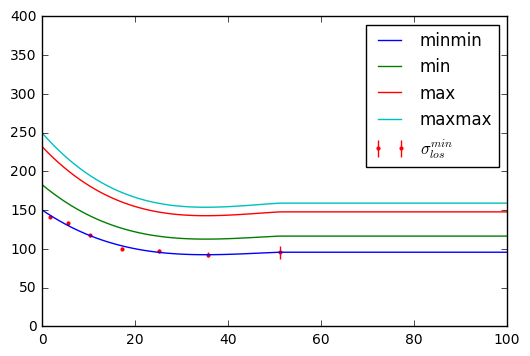

In [31]:
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

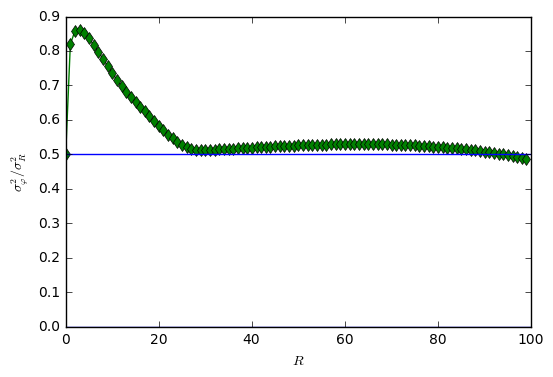

In [32]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0);

Т.к. насчет малой оси я не уверен - приближения делаем по большой.

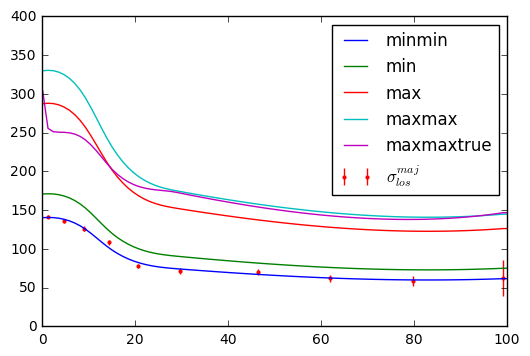

In [33]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Для настоящей maxmaxtrue почти не отличается от maxmax.

Добавим оценку из Ноордермеера и Герссена, а также сравним major vs minor оценки:

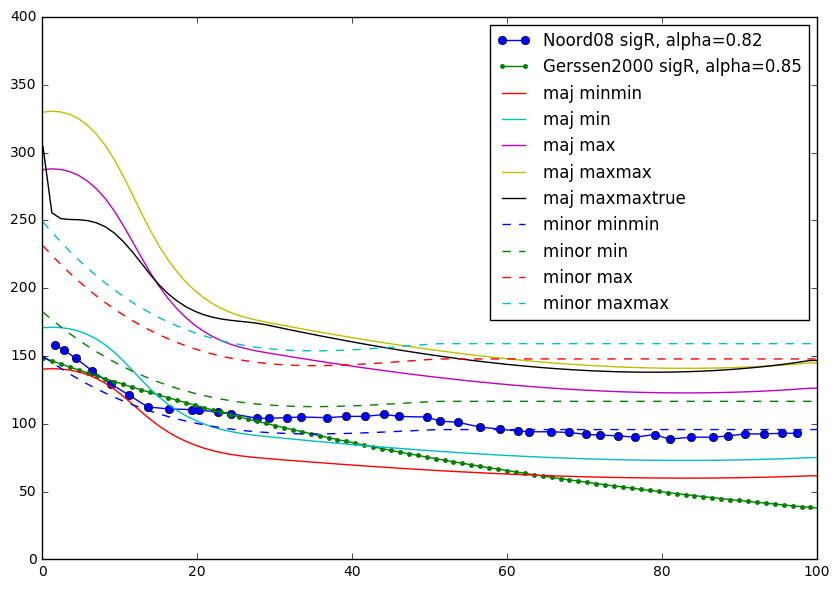

In [34]:
fig = plt.figure(figsize=[10, 7])

r_sig_n, sig_R_n = zip(*np.loadtxt("noordermeer_data/n08_sigR.dat", float, delimiter=','))
plt.plot(map(lambda l: l/0.102, r_sig_n), sig_R_n, 'o-', label='Noord08 sigR, alpha=0.82')

plt.plot(points, map(lambda l: 149.*np.exp(-l/73.), points), '.-', label='Gerssen2000 sigR, alpha=0.85')

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Видно, что оценка Ноордрмеера лежит около minor minmin, тогда как оценка Герссена куда хуже и вообще плоха. Также видно, что почти везде оценки из минимальной дисперсии точнее, чем из максимальной, однако там короче сами данные (почти в два раза). Можно попытаться в центральной части использовать более точные оценки.

TODO: посмотреть дисперсиии тут http://adsabs.harvard.edu/cgi-bin/bib_query?2008MNRAS.390.1089P

## Данные по газу

TODO: поискать еще данные и добавить статьи

* https://arxiv.org/pdf/1103.4928v1.pdf - HI (WSRT)
* https://arxiv.org/pdf/astro-ph/0703352v1.pdf - HI (WSRT)
* https://arxiv.org/pdf/0808.0132v1.pdf - Halpha

TODO: добавить

### Кривая вращения

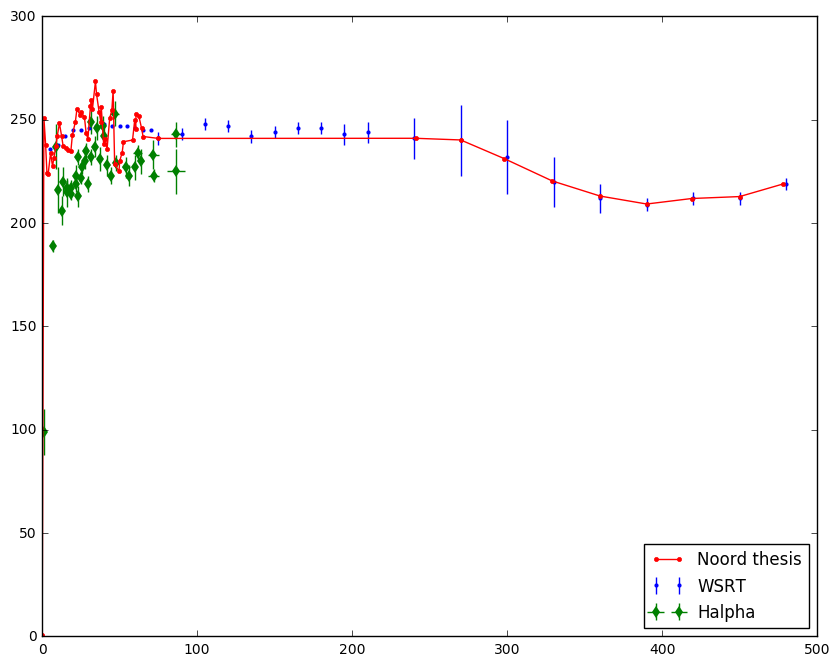

In [35]:
fig = plt.figure(figsize=[10,8])

# TODO: проверить как сняты данные
# Noordermeer+2007 ionized gas + HI
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))

# Данные по кинематике газа Epinat+2008 в Halpha
r_ha, dr_ha,_,_, vel_ha, e_vel_ha, _,_ = zip(*np.loadtxt("v_gasHa.dat", str))
r_ha, dr_ha, vel_ha, e_vel_ha = np.array(r_ha, dtype='float'), np.array(dr_ha, dtype='float'), np.array(vel_ha, dtype='float'), np.array(e_vel_ha, dtype='float')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_ha, vel_ha, yerr=e_vel_ha, xerr=dr_ha, fmt='.', marker='d', mew=0, label = 'Halpha')
plt.plot(r, vel, '.-', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right');

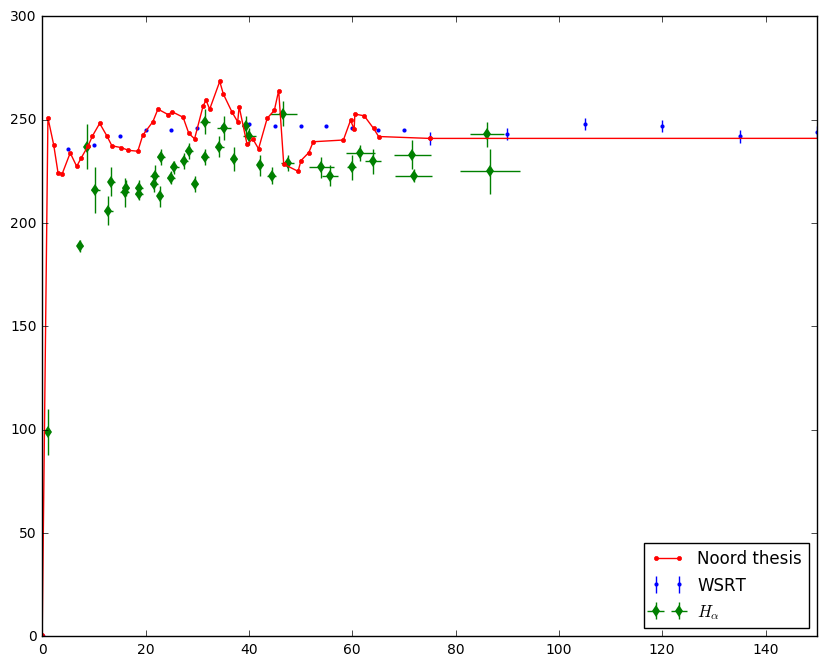

In [36]:
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_ha, vel_ha, yerr=e_vel_ha, xerr=dr_ha, fmt='.', marker='d', mew=0, label = r'$H_{\alpha}$')
plt.plot(r, vel, '.-', label = 'Noord thesis')
plt.ylim(0, 300)
plt.xlim(0, 150.)
plt.legend(loc='lower right');

Видно, что я неплохо снял данные из диссертации и что в целом все данные следуют друг другу. Опять, как и в 3898 $H_{\alpha}$ ниже HI.

Приблизим:

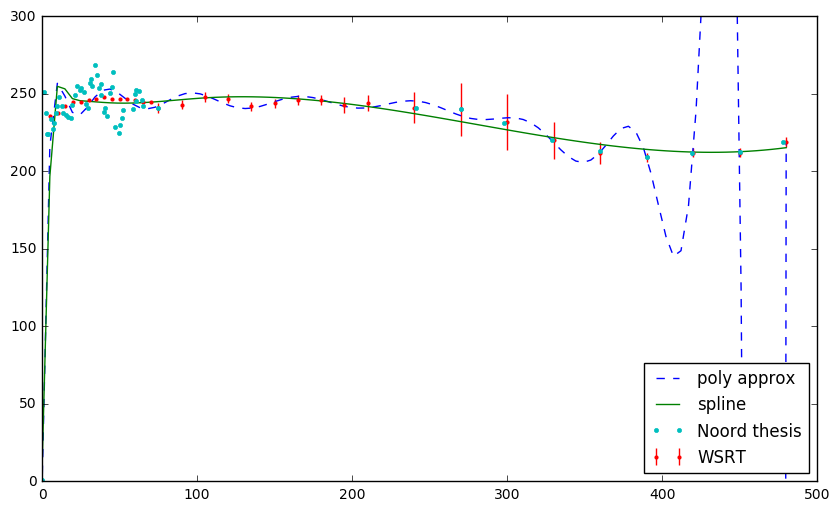

In [37]:
fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_wsrt, vel_wsrt, deg=17))
test_points = np.linspace(min(r_wsrt), max(r_wsrt), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_wsrt, vel_wsrt, k=3, s=2400.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(r, vel, '.', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right');

Непонятно конечно, что делать с таким обилием точек как раз в нужной области - по ним выходит, что все не так уж гладко там.

TODO: разобраться

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

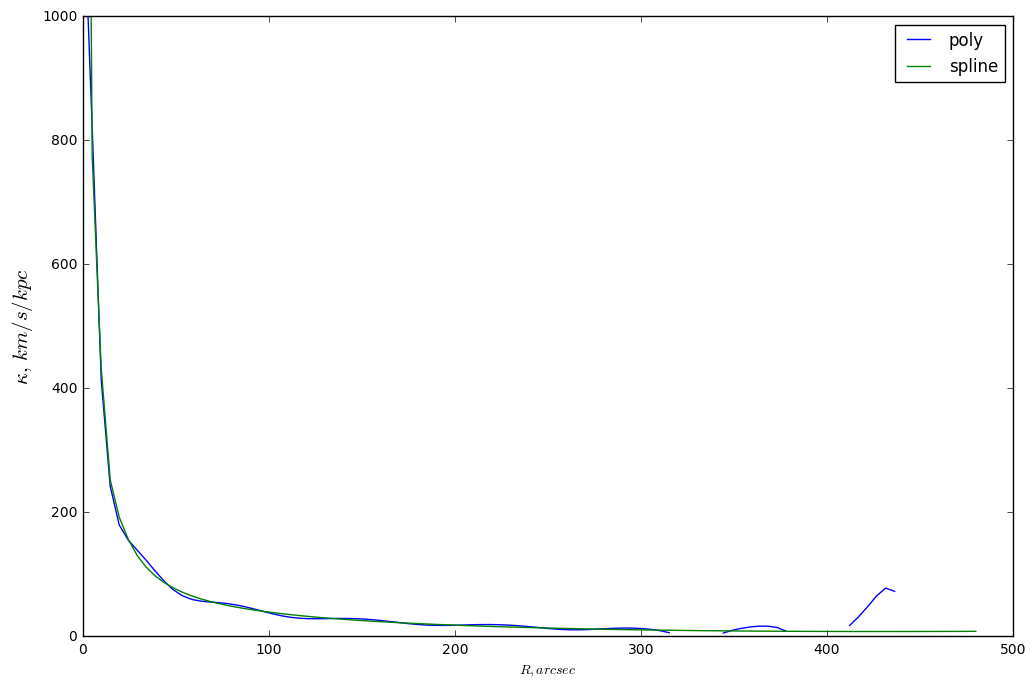

In [38]:
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 1000)
plt.legend();

### Поверхностная плотность газа 

Плотность HI:

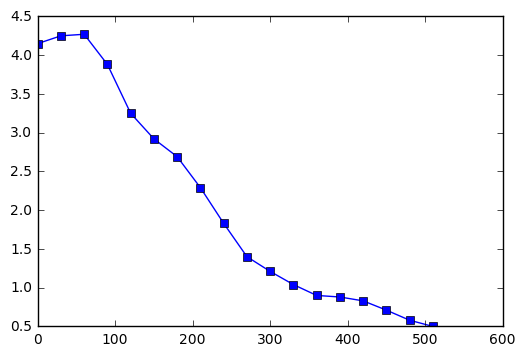

In [39]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-');

По $\rm{CO}$ есть профиль интенсивности в работе THE FCRAO EXTRAGALACTIC CO SURVEY. I. THE DATA (1995) http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1995ApJS...98..219Y&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf 

Ее можно пересчитать в профиль плотности по формуле из van der Hulst 2016 $$\Sigma_{H_2}[M_{\circ}\,{pc}^{−2}] = 3.2\times I_{CO} [K\, km\, s^{−1}]$$

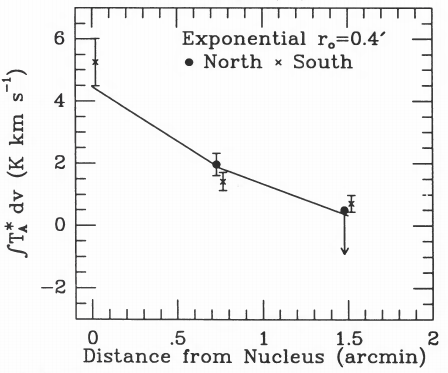

In [40]:
Image('2985_CO_data.png')

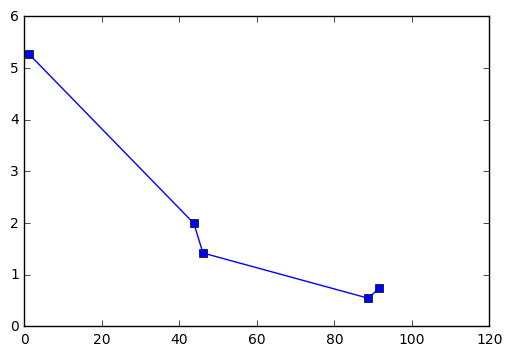

In [41]:
r_H2_dens, H2_dens = zip(*[(1.134957189032626, 5.274475407021447),
(43.71959002993408, 1.9954912250580392),
(46.072588290621894, 1.421413695030643),
(88.78352654877163, 0.5450392278349678),
(91.457215159636, 0.737871470054718)])

plt.plot(r_H2_dens, H2_dens, 's-')
plt.xlim(0, 120.);

In [42]:
H2_dens = [3.2*l for l in H2_dens]

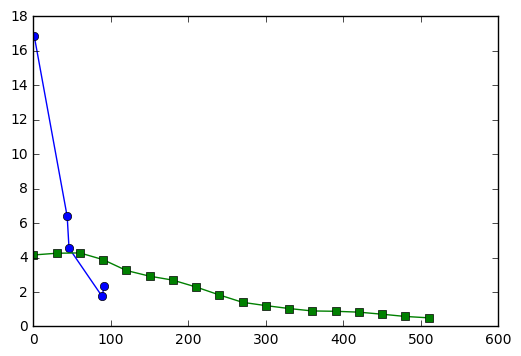

In [43]:
plt.plot(r_H2_dens, H2_dens, 'o-')
plt.plot(r_g_dens, gas_dens, 's-');

Вполне похоже на правду.

## Данные по фотометрии

Диплом: B, R - маленькие, около 60, макс. диск ~ 450 (M/L=6), другие R и J - больше 1000, похоже два диска

* Noordermeer 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract
* Méndez-Abreu https://ui.adsabs.harvard.edu/#abs/2008A&A...478..353M/abstract в J
* Gutierrez https://ui.adsabs.harvard.edu/#abs/2011AJ....142..145G/abstract в R (есть еще кстати $B-R$ цвет)
* https://arxiv.org/pdf/1510.05752v1.pdf - декомпозиция из кривой вращения, соотв. прямая массовая модель
* в http://adsabs.harvard.edu/cgi-bin/bib_query?1998AJ....116.1626B и https://arxiv.org/pdf/1104.1053v1.pdf без диска(
* http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf - J, H, K
* S4G http://adsabs.harvard.edu/abs/2015ApJS..219....4S (в онлайн данных)
* https://arxiv.org/abs/astro-ph/0005454 Gerssen 2000 в $I$, но без центральной яркости(

In [44]:
all_photometry = []

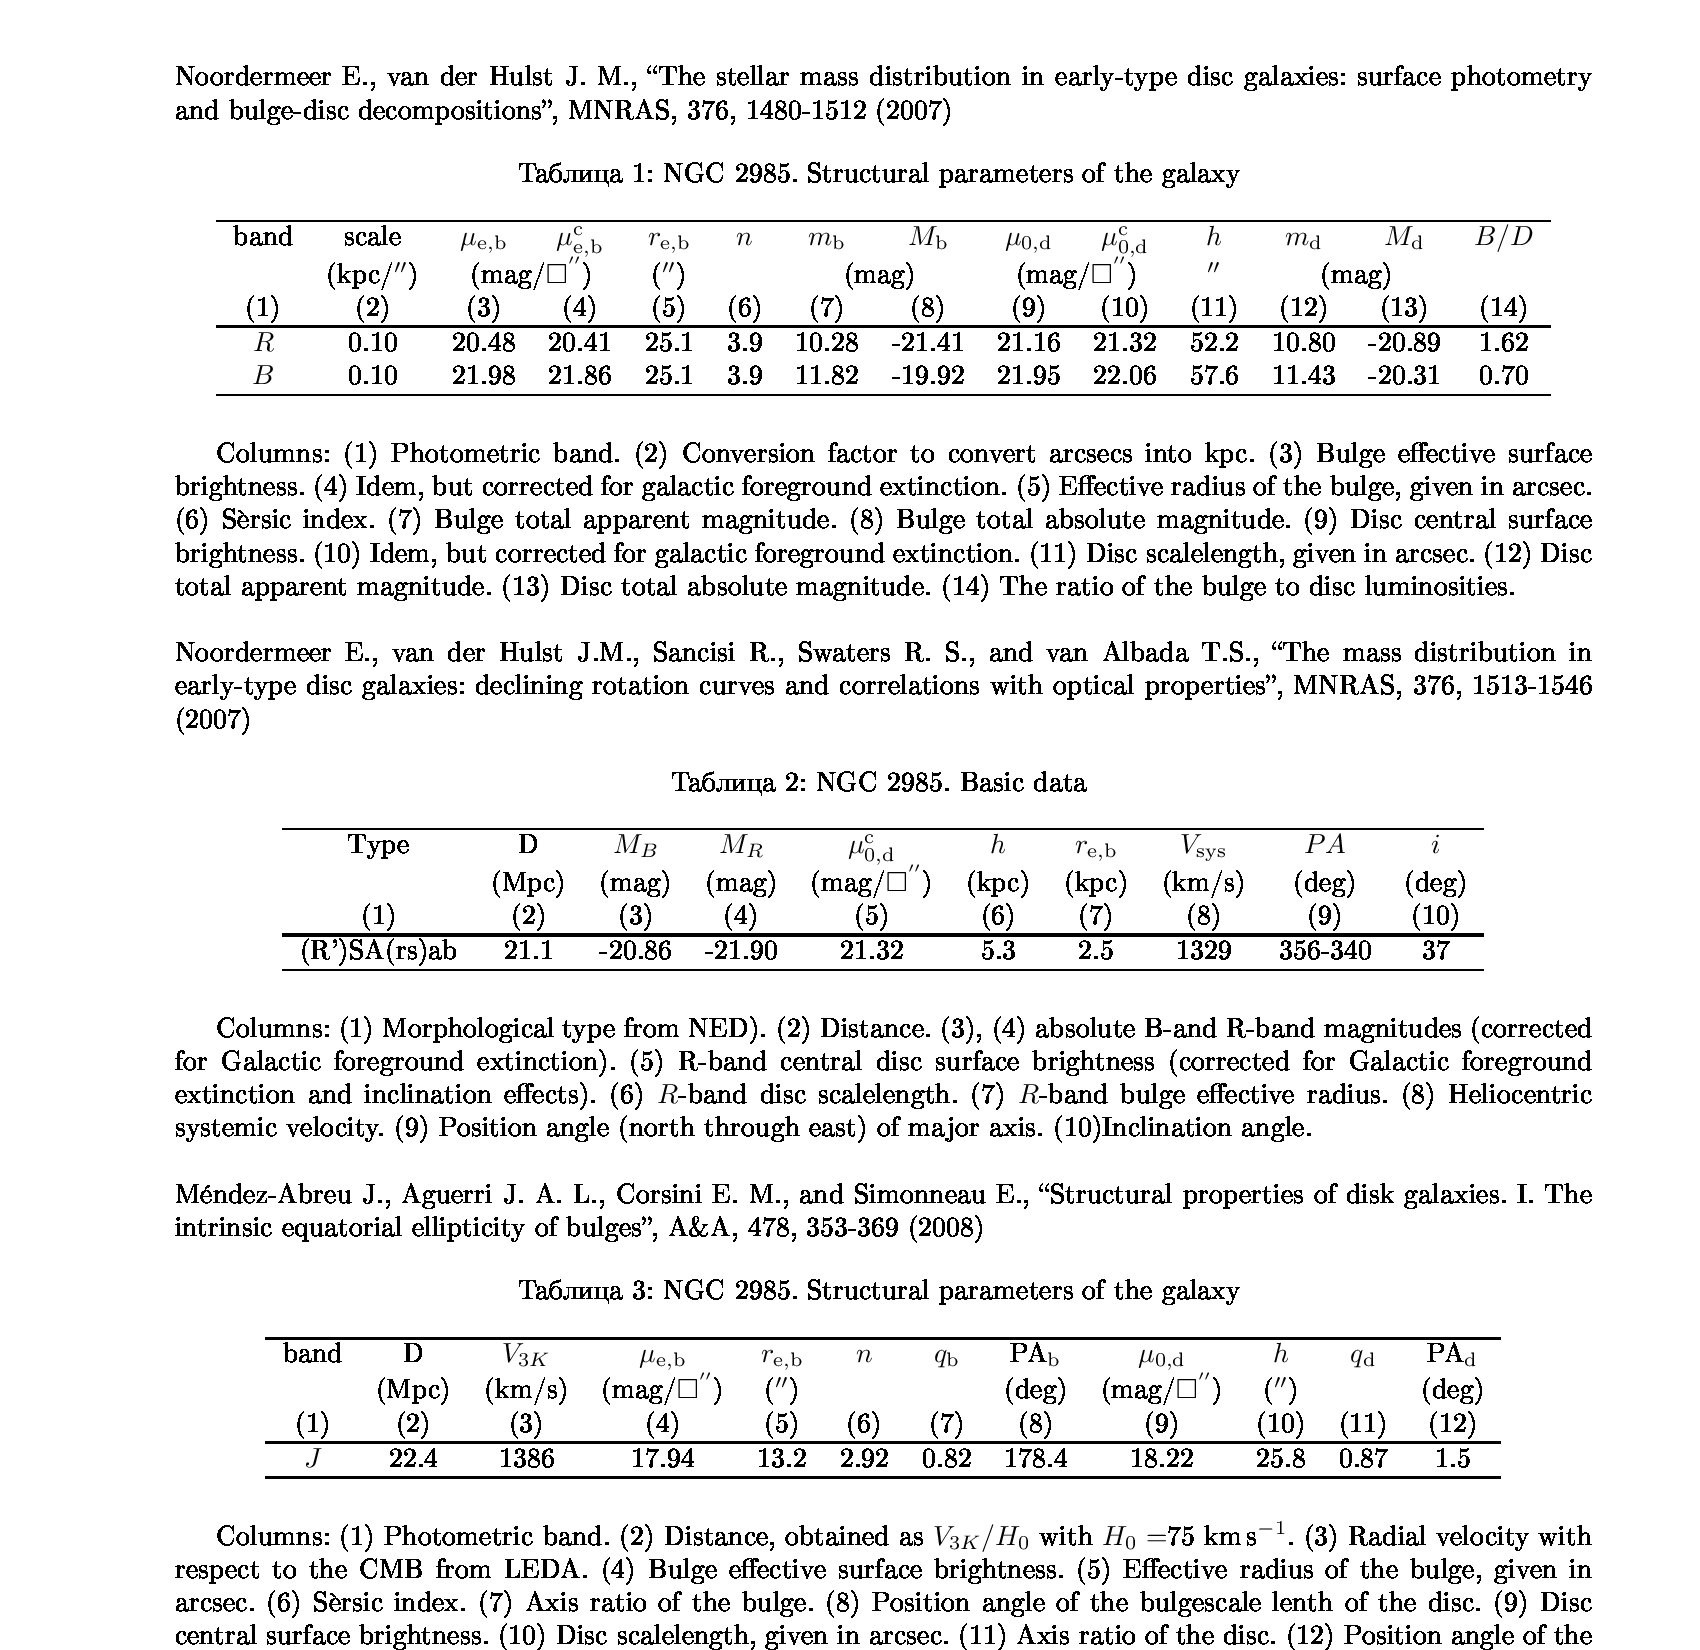

In [45]:
from wand.image import Image as WImage
img = WImage(filename='ngc2985.pdf', resolution=200)
img[:, 150:1800]

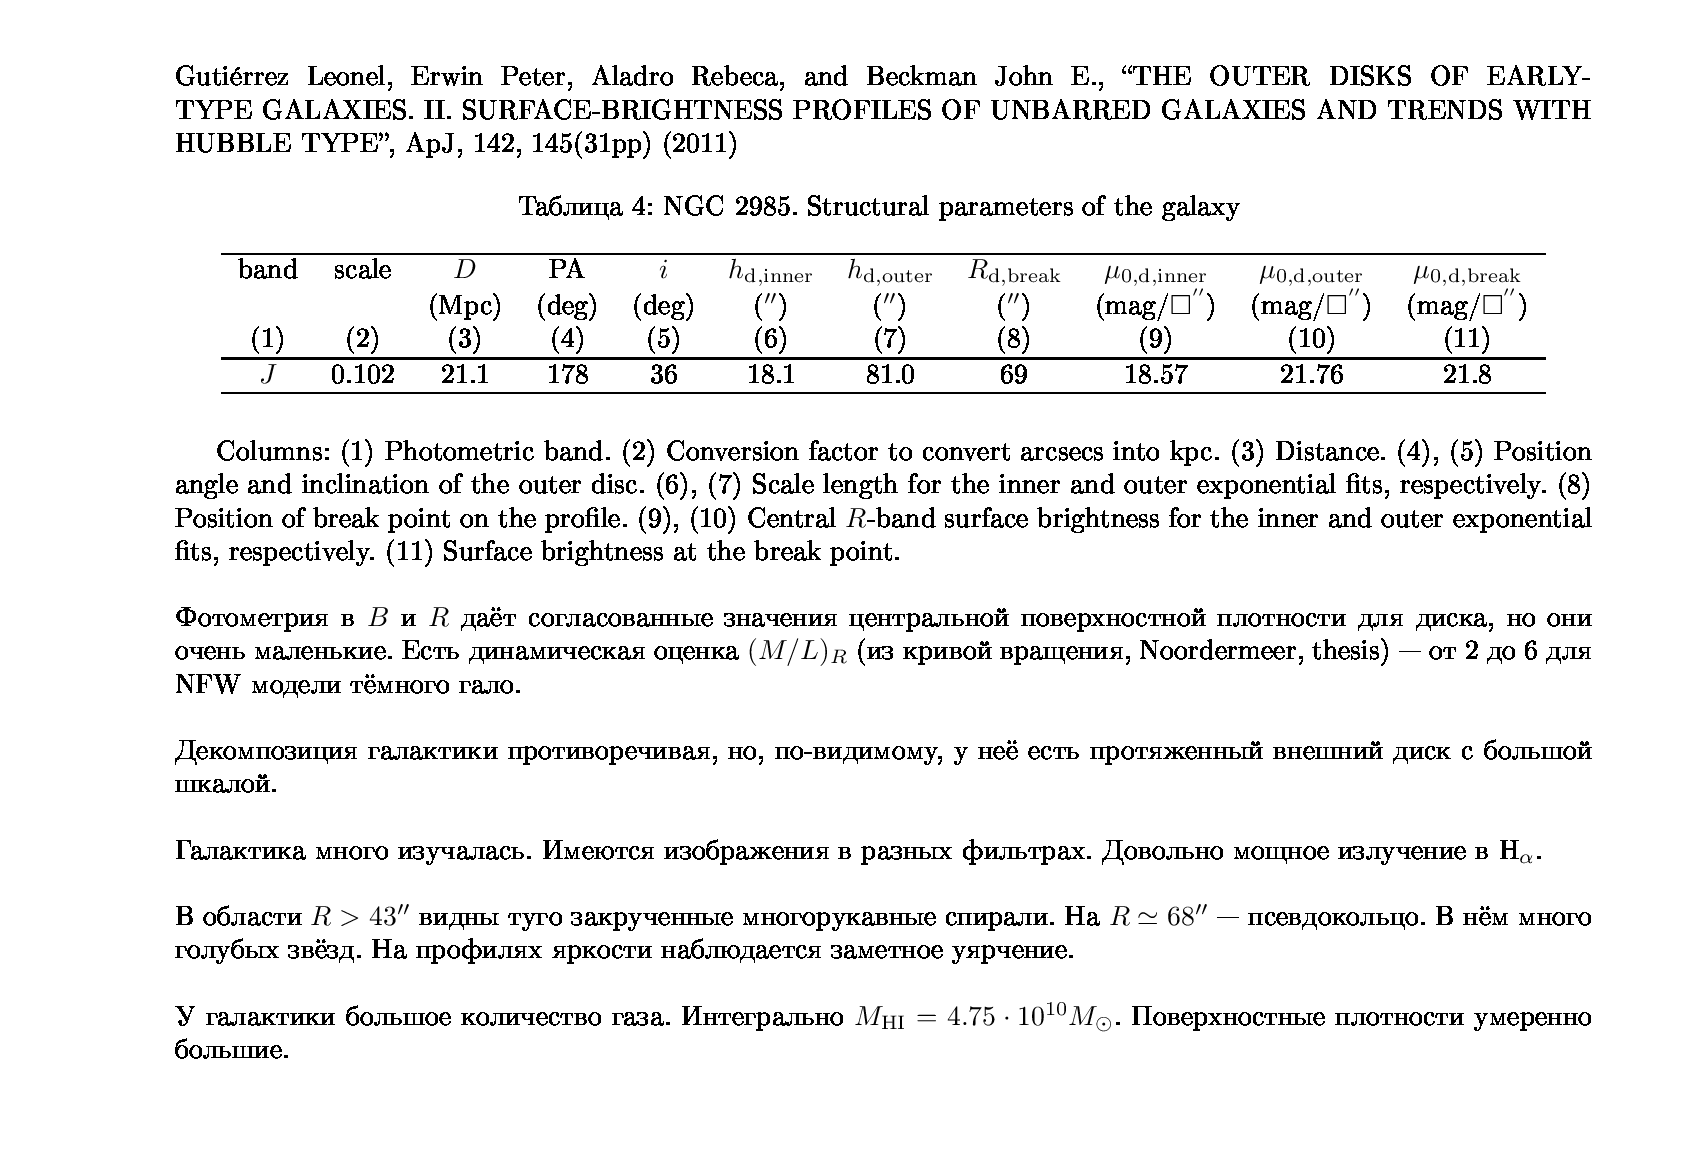

In [46]:
img = WImage(filename='ngc2985.pdf[1]', resolution=200)
img[:, 150:1300]

In [47]:
all_photometry = []

Фотометрия Ноордермеера:

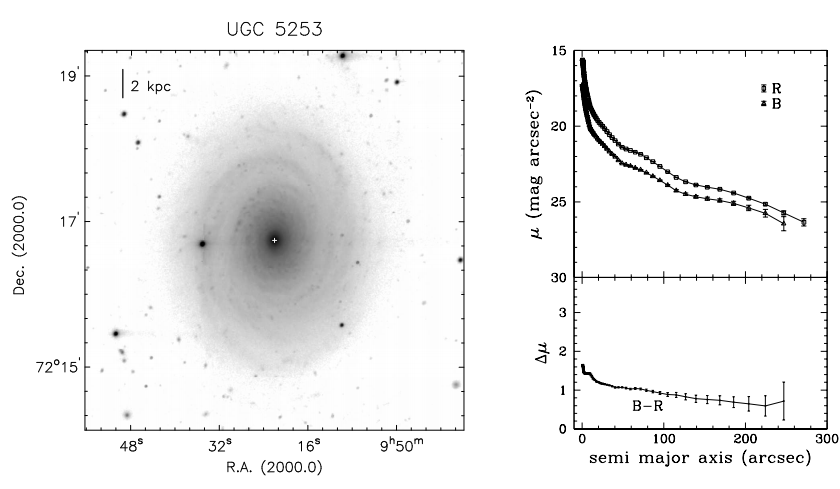

In [48]:
Image('noordermeer_data/n2985_photom.png')

Снятые R-данные:

(30, 15)

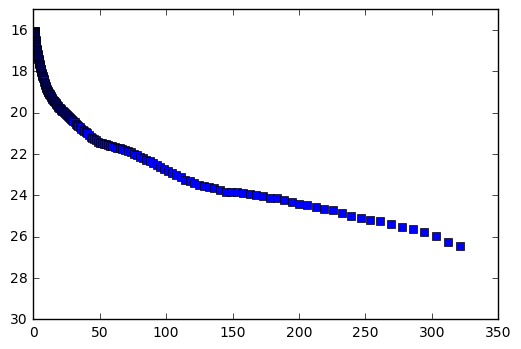

In [49]:
r_phot2, r_band = zip(*np.loadtxt('Rband_ngc2985.dat', float))

plt.plot(r_phot2, r_band, 's')
plt.ylim(30, 15)

Снятые вместе данные:

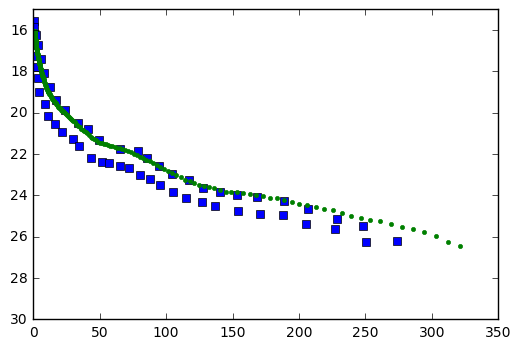

In [50]:
r_phot, mu_phot = zip(*np.loadtxt('noordermeer_data/n2985_noord_photoRB.dat', float, delimiter=','))

plt.plot(r_phot, mu_phot, 's')
plt.plot(r_phot2, r_band, '.')
plt.ylim(30, 15);

Согласуются.

In [51]:
M_R = -20.89 #10.80 - это правильно? надо брать абсолютные? в дипломе были относительные, тут разница уже существенная
M_B = -20.31 #11.43

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [52]:
print 'Abs B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'B', 'B-R'), bell_mass_to_light(M_B-M_R, 'R', 'B-R'))
print 'Rel B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(11.43-10.80, 'B', 'B-R'), bell_mass_to_light(11.43-10.80, 'R', 'B-R'))

Abs B : 0.47; R: 0.75.
Rel B : 0.53; R: 0.81.


Тут разница не очень большая, что именно брать - и то и то маленькое.

In [53]:
# R-band
r_eff_R = 25.1
mu_eff_R = 20.48 # уточнить это ли число
n_R = 3.9
mu0d_R = 21.16 # и тут тоже
h_disc_R = 52.2

mu_eff_Rc = 20.41 # уточнить это ли число
mu0d_Rc = 21.32 # и тут тоже

In [54]:
# B-band
r_eff_B = 25.1
mu_eff_B = 21.98 # уточнить это ли число
n_B = 3.9
mu0d_B = 21.95 # и тут тоже
h_disc_B = 57.6

mu_eff_Bc = 21.86 # уточнить это ли число
mu0d_Bc = 22.06 # и тут тоже

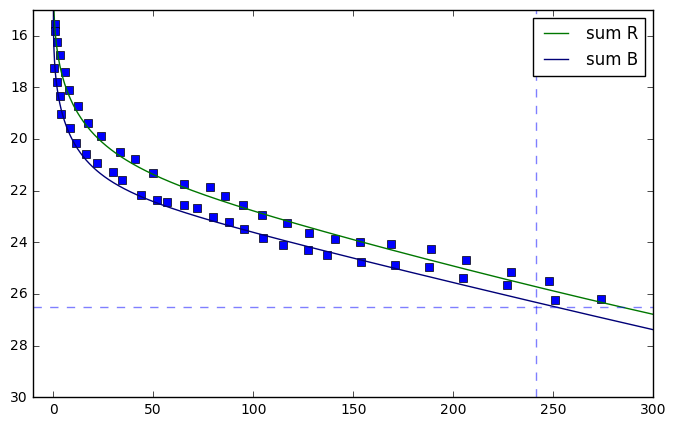

In [55]:
p_ = np.arange(0., 300., 0.1)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')

plt.axvline(x = h_disc_B*(26.5 - mu0d_B)/1.0857, ls='--', alpha=0.5) # как указать расстояние, соответствующее 26.5m
plt.axhline(y=26.5, ls='--', alpha=0.5)

plt.xlim(-10, 300)
plt.ylim(30, 15)
plt.legend();

Отлично, похоже на правду. Массовые модели:

0.58 0.63


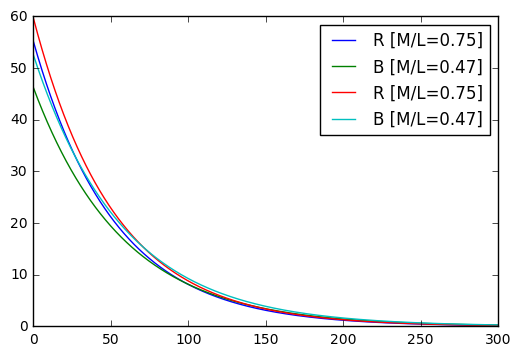

In [56]:
b_r_color = M_B-M_R

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

diploma_color = 11.43-10.80

M_to_L_Rc = bell_mass_to_light(diploma_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_Bc = bell_mass_to_light(diploma_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

print b_r_color, diploma_color

plt.legend();

Тут все как в дипломе, очень маленькие значения получились. Разница в цвете никакая, можно не учитывать.

In [57]:
all_photometry.append((BAD_MODEL_PREFIX+'Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_Rc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R')))
all_photometry.append((BAD_MODEL_PREFIX+'Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_Bc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B')))

Méndez-Abreu фотометрия в $J$:

In [58]:
# J-band
r_eff_J = 13.2
mu_eff_J = 17.94
n_J = 2.92
mu0d_J = 18.22
h_disc_J = 25.8

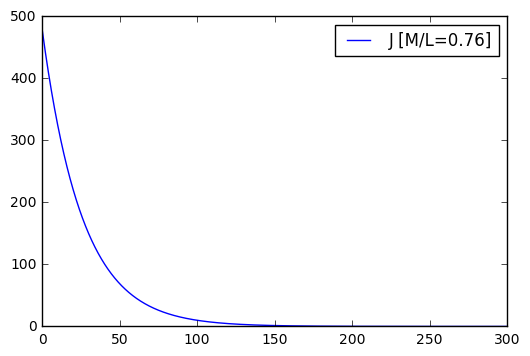

In [59]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.legend();

Получилось не то, что в дипломе - надо понять, почему.

TODO: понять почему отличается (M/L в дипломе другое)

In [60]:
all_photometry.append((BAD_MODEL_PREFIX+'Mendez-Abreu J', r_eff_J, mu_eff_J, n_J, mu0d_J, h_disc_J, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J')))

Gutierrez в $R$ (в пдф-ке неверно записано J), модель достаточно странная - ибо нет балджа.

In [61]:
h_in=18.1
h_out=81.0
h_brk=69.
mu_in=18.57
mu_out=21.76
mu_brk=21.8

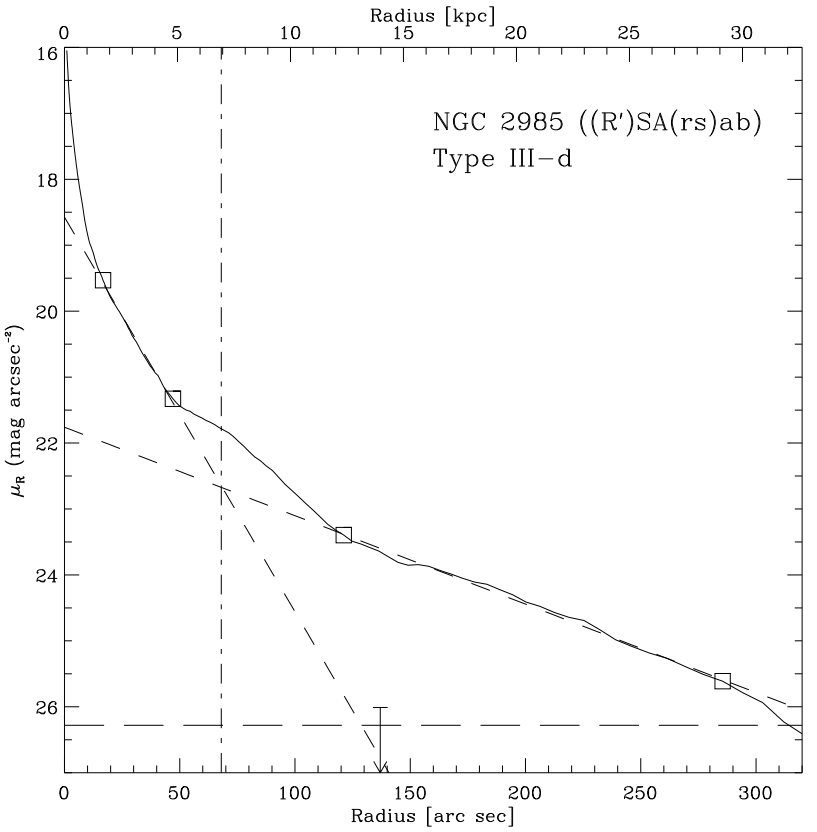

In [62]:
Image('gutierrez_Rphotom.png', width=500)

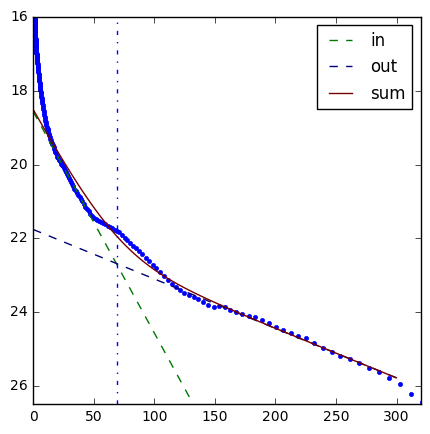

In [63]:
fig = plt.figure(figsize=[5, 5])

_, _, r_phot2, mu_phot2 = zip(*np.loadtxt("gutierrez_Rphotom.dat", str)) #данные из таблицы в Vizier
plt.plot(r_phot2, mu_phot2, '.')

plt.plot(p_, [mu_disc(l, mu0=mu_in, h=h_in) for l in p_], '--', label='in', color='#007700')
plt.plot(p_, [mu_disc(l, mu0=mu_out, h=h_out) for l in p_], '--', label='out', color='#000077')
plt.plot(p_, total_mu_profile([mu_disc(l, mu0=mu_in, h=h_in) for l in p_], 
                              [mu_disc(l, mu0=mu_out, h=h_out) for l in p_]), '-', label='sum', color='#770000')


plt.xlim(0., 320)
plt.ylim(26.5, 16)
plt.legend()
plt.axvline(x = h_brk, linestyle='-.');

Похоже. Возьмем оба диска:

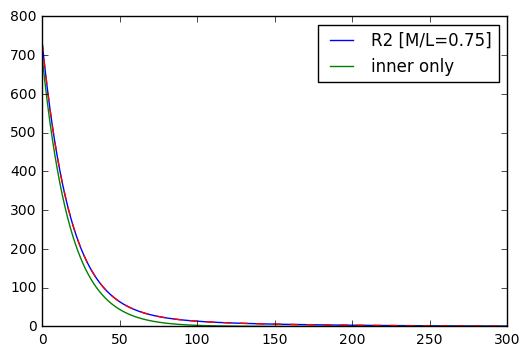

In [64]:
surf_R2 = [surf_density(mu=m, M_to_L=M_to_L_R, band='R') for m in 
           total_mu_profile([mu_disc(l, mu0=mu_in, h=h_in) for l in p_], 
                              [mu_disc(l, mu0=mu_out, h=h_out) for l in p_])]
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))

surf_R2_ = [surf_density(mu=mu_disc(l, mu0=mu_in, h=h_in), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R2_, '-', label='inner only'.format(M_to_L_R)) #только внутренний диск

plt.plot(p_, np.array([surf_density(mu=mu_disc(l, mu0=mu_in, h=h_in), M_to_L=M_to_L_R, band='R') for l in p_])+
         np.array([surf_density(mu=mu_disc(l, mu0=mu_out, h=h_out), M_to_L=M_to_L_R, band='R') for l in p_]), '--') #проверяю, что одно и то же получается

plt.legend();

Опять отличается, не ясно почему (M/L на этот раз похоже), хотя все вместе вполне нормальное.

TODO: понять почему

In [65]:
all_photometry.append(('Gutierrez R 2d', None, None, None, (mu_in, mu_out), (h_in, h_out), M_to_L_R, 
                       (lambda l: surf_density(mu=mu_disc(l, mu0=mu_in, h=h_in), M_to_L=M_to_L_R, band='R'),
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu_out, h=h_out), M_to_L=M_to_L_R, band='R'))))

Декомпозиция в Sofue 2016 из кривой вращения:

In [66]:
M_bulge = 0.39 #± 0.07
a_b = 0.56 #± 0.14 kpc
M_disk = 1.1 #± 0.1
a_d = 1.1 #± 0.2 kpc

Для диска верно: $M_d = 2\pi a_d^2 \Sigma_0$

In [67]:
M_disk * 10.**10 / (2*np.pi) / (a_d * 1000.)**2

1446.8631190172305

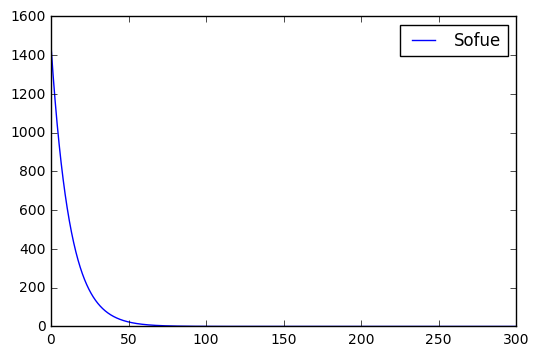

In [68]:
Sigma_0_sofue = M_disk * 10.**10 / (2*np.pi) / (a_d * 1000.)**2
surf_sofue = [Sigma_0_sofue*np.exp(-l*scale/a_d) for l in p_]
plt.plot(p_, surf_sofue, '-', label='Sofue')
plt.legend();

Наконец, JHK из работы Heidt 2001 http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf:

In [69]:
mudJ, mudH, mudK = 18.05, 17.27, 17.32 
hJ, hH, hK = 30.63, 26.10, 31.08
mueJ, mueH, mueK = 17.73, 17.03, 17.23 
reJ, reH, reK = 12.08, 12.81, 14.06
nJ, nH, nK = 1./0.35, 1./0.35, 1./0.33

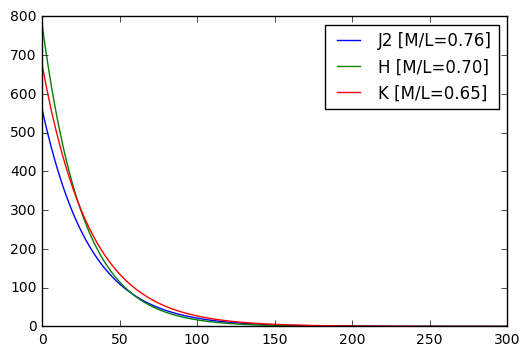

In [70]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J2 = [surf_density(mu=mu_disc(l, mu0=mudJ, h=hJ), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J2, '-', label='J2 [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_r_color, 'H', 'B-R')
surf_H = [surf_density(mu=mu_disc(l, mu0=mudH, h=hH), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_r_color, 'K', 'B-R')
surf_K = [surf_density(mu=mu_disc(l, mu0=mudK, h=hK), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))


plt.legend();

На удивление согласуется друг с другом. 

In [71]:
all_photometry.append(('Heidt J', reJ, mueJ, nJ, mudJ, hJ, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mudJ, h=hJ), M_to_L=M_to_L_J, band='J')))

all_photometry.append(('Heidt K', reK, mueK, nK, mudK, hK, M_to_L_K, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mudK, h=hK), M_to_L=M_to_L_K, band='K')))

all_photometry.append(('Heidt H', reH, mueH, nH, mudH, hH, M_to_L_H, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mudH, h=hH), M_to_L=M_to_L_H, band='H')))

В работе Герссена 2000го года есть фотометрия в $I$ и декомпозиция на диск-балдж, но там как-то произвольно выбраны величины на оси:

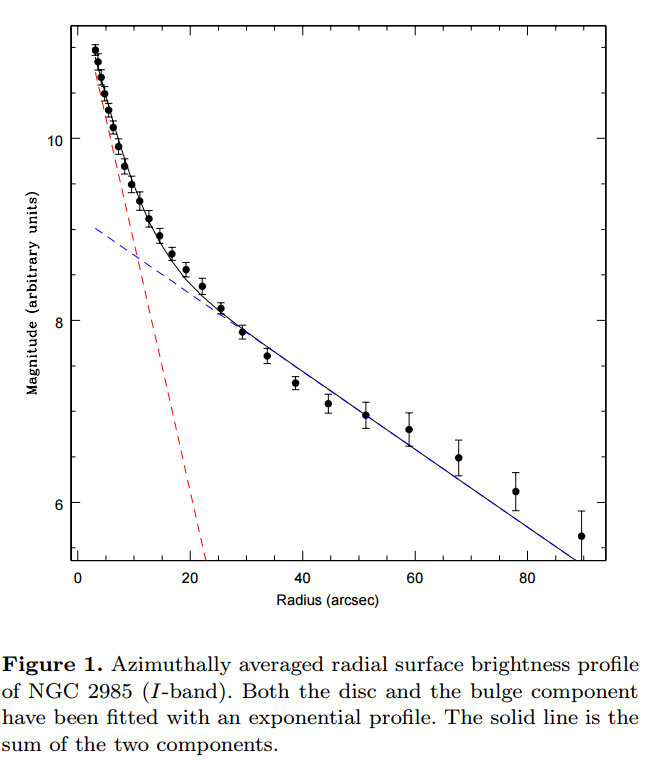

In [72]:
Image('gerssen_I_photom.png')

Единственное что понятно - что $h_{disc} = 30 \pm 4$.

**S4G** данные из GALFIT (дисков два, непонятно в чем отличие):

In [73]:
r_eff_s4g = 6.32
# mu_eff_s4g = ...
n_s4g = 2.822
mu0d_s4g = 18.552
h_disc_s4g = 12.78

mu0d_s4g_2 = 20.845
h_disc_s4g_2 = 48.89

Тут нужно учитывать, что эти параметры в AB-mag и нуждаются в доп. исправлении.

In [74]:
M_to_L_s4g = s4g_mass_to_light(-21.746, -21.276)
M_to_L_s4g

0.66577885816424509

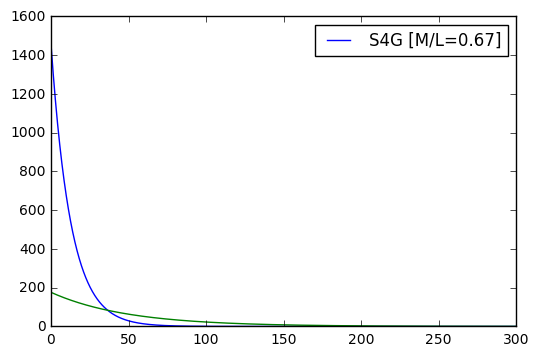

In [75]:
surf_s4g = [s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L_s4g) for l in p_]
plt.plot(p_, surf_s4g, '-', label='S4G [M/L={:2.2f}]'.format(M_to_L_s4g))
plt.plot(p_, [s4g_surf_density(mu_disc(l, mu0=mu0d_s4g_2, h=h_disc_s4g_2), M_to_L_s4g) for l in p_], '-')
plt.legend();

Достаточно массивный.

In [76]:
all_photometry.append(('S4G 2d', r_eff_s4g, None, n_s4g, (mu0d_s4g, mu0d_s4g_2), (h_disc_s4g, h_disc_s4g_2), M_to_L_s4g, 
                       (lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L_s4g),
                       lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g_2, h=h_disc_s4g_2), M_to_L_s4g))))

Cаша Мосенков прогнал GALFIT декомпозиию для двух моделей - с двумя дисками и с одним. Результаты (пиксели в секунды переводятся домножением на 0.75, центр. поверх яркость по m0d = mag + 2.5*log10(2.*math.pi*h^2)):

In [77]:
h_AM = 31.4388 * 0.75
mu0d_AM = 12.0660 + 2.5*np.log10(2.*math.pi*h_AM**2)

h_AM, mu0d_AM

(23.5791, 20.924085792482593)

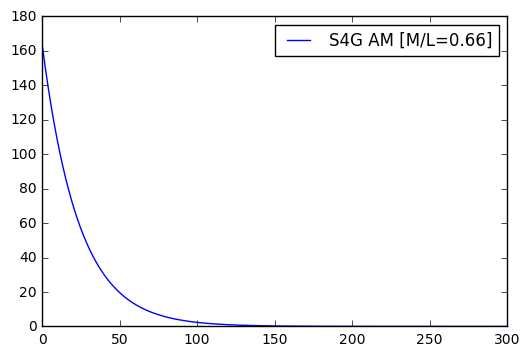

In [78]:
surf_s4g_AM = [s4g_surf_density(mu_disc(l, mu0=mu0d_AM, h=h_AM), M_to_L_s4g) for l in p_]
plt.plot(p_, surf_s4g_AM, '-', label='S4G AM [M/L={:2.2f}]'.format(0.66))
plt.legend();

Слишком маленькая.

Двухдисковая:

In [79]:
h_AM_in = 15.6155 * 0.75
mu0d_AM_in = 10.9384 + 2.5*np.log10(2.*math.pi*h_AM_in**2)

h_AM_out = 62.9739 * 0.75
mu0d_AM_out = 10.3740 + 2.5*np.log10(2.*math.pi*h_AM_out**2)

h_AM_in, mu0d_AM_in, h_AM_out, mu0d_AM_out

(11.711625000000002, 18.276935461189019, 47.230425, 20.740558938724199)

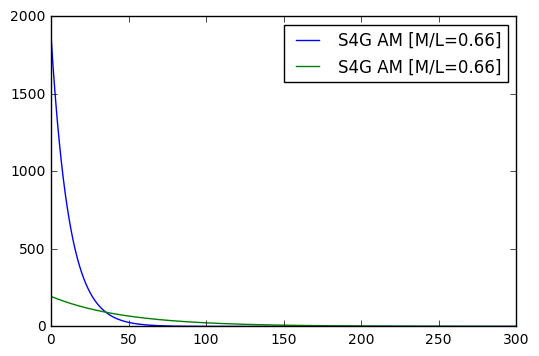

In [80]:
surf_s4g_AM_in = [s4g_surf_density(mu=mu_disc(l, mu0=mu0d_AM_in, h=h_AM_in), M_to_L=M_to_L_s4g) for l in p_]
plt.plot(p_, surf_s4g_AM_in, '-', label='S4G AM [M/L={:2.2f}]'.format(0.66))
surf_s4g_AM_out = [s4g_surf_density(mu=mu_disc(l, mu0=mu0d_AM_out, h=h_AM_out), M_to_L=M_to_L_s4g) for l in p_]
plt.plot(p_, surf_s4g_AM_out, '-', label='S4G AM [M/L={:2.2f}]'.format(0.66))
plt.legend();

Как видим - поменялось не так уж сильно, раза в полтора, но итог очень тяжеловесный.

In [81]:
all_photometry.append(('S4G_AM 2d', None, None, None, (mu0d_AM_in, mu0d_AM_out), (h_AM_in, h_AM_out), M_to_L_s4g, 
                       (lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_AM_in, h=h_AM_in), M_to_L_s4g),
                       lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_AM_out, h=h_AM_out), M_to_L_s4g))))

**Финальная сводная картинка:**

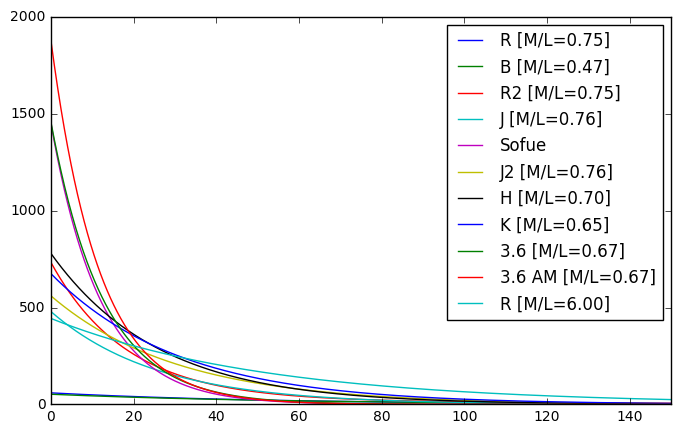

In [82]:
fig = plt.figure(figsize=[8, 5])
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_sofue, '-', label='Sofue')
plt.plot(p_, surf_J2, '-', label='J2 [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))
plt.plot(p_, surf_s4g, '-', label='3.6 [M/L={:2.2f}]'.format(M_to_L_s4g))
plt.plot(p_, surf_s4g_AM_in, '-', label='3.6 AM [M/L={:2.2f}]'.format(M_to_L_s4g))

#maximal disk
plt.plot(p_, [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=6., band='R') for l in p_], '-', label='R [M/L={:2.2f}]'.format(6.))

plt.legend()
plt.xlim(0, 150.);

In [83]:
all_photometry.append(('Noorder R_max', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, 6., 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=6., band='R')))

Видно, что фотометрия Ноордрмеера совсем какая-то левая, пять остальных примерно согласуются со значениями в 500-800 и есть две очень большие, одна из которых S4G (а одна совсем большая).

На самом деле во всем этом еще важна скорость падения! Видно, что в интересующем нас диапазоне эти фотметрии по сути разбиваются на две группы.

In [84]:
show_all_photometry_table(all_photometry, scale)

+------+------------------+---------+----------+--------+----------------+----------------+-------+-------------+-----------+
|      | Name             |   r_eff |   mu_eff |      n | mu0_d          | h_disc         |   M/L | M_d/M_sun   |   Sigma_0 |
|------+------------------+---------+----------+--------+----------------+----------------+-------+-------------+-----------|
| 0.00 | b:Noorder R      |   25.10 |    20.41 |   3.90 | 21.32          | 52.2           |  0.81 | 8.47E+09.   |        60 |
| 1.00 | b:Noorder B      |   25.10 |    21.86 |   3.90 | 22.06          | 57.6           |  0.53 | 9.08E+09.   |        53 |
| 2.00 | b:Mendez-Abreu J |   13.20 |    17.94 |   2.92 | 18.22          | 25.8           |  0.76 | 1.66E+10.   |       479 |
| 3.00 | Gutierrez R 2d   |  nan    |   nan    | nan    | (18.57, 21.76) | (18.1, 81.0)   |  0.75 | 2.44E+10.   |       732 |
| 4.00 | Heidt J          |   12.08 |    17.73 |   2.86 | 18.05          | 30.63          |  0.76 | 2.73E+10.   |     

### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

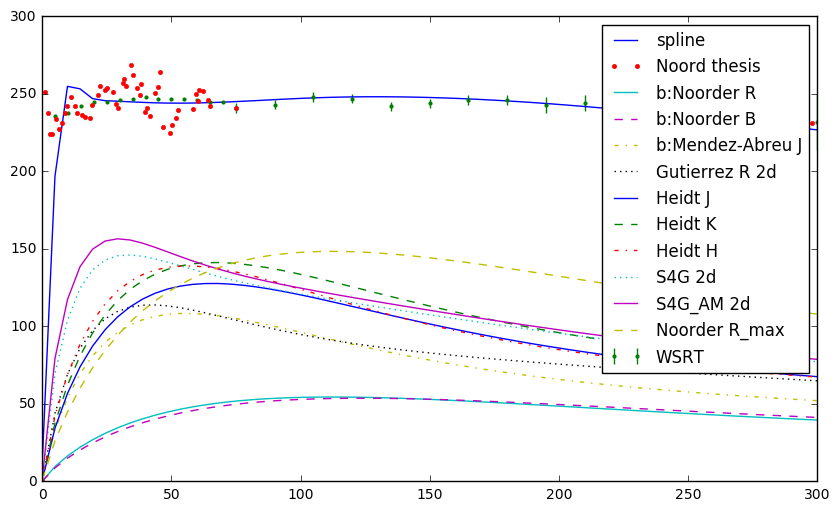

In [85]:
fig = plt.figure(figsize=[10,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(r, vel, '.', label = 'Noord thesis')

for ind, photom in enumerate(all_photometry):
    if type(photom[5]) == tuple:
        plt.plot(test_points, map(lambda l: disc_vel(l, photom[7][0](0), photom[5][0], scale, 
                                                     Sigma0_2=photom[7][1](0), h_2=photom[5][1]), test_points), next(linecycler), label=photom[0])
    else:
        plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0])
        
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(loc='best');

Видно, что все двухдисковые модели похожи друг на друга, но тут опять же сложно выявить максимум.

## Зоны звездообразования


Hameed & Devereux 2005 http://iopscience.iop.org/article/10.1086/430211/pdf $H_{\alpha}$ (расстояние у него 22.4 Мпк, тогда как у нас scale для ~19 Мпк):

TODO: поискать еще данных и измерить корректно размер

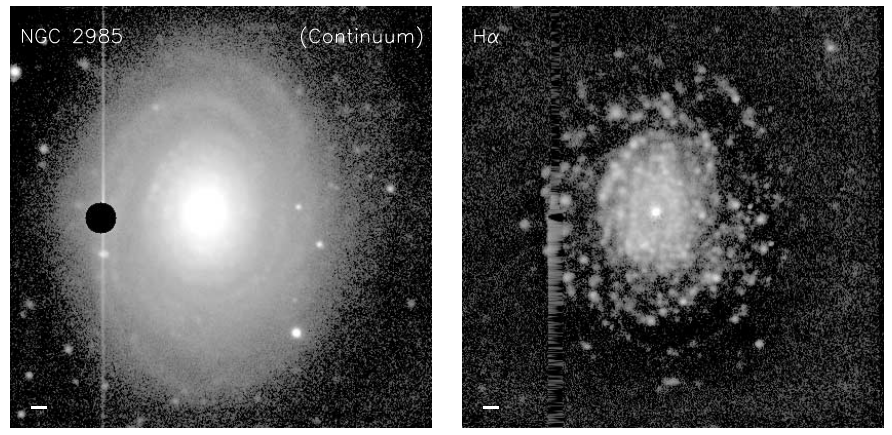

In [86]:
Image('ngc2985_Halpha.jpg')

Вручную примерно так:

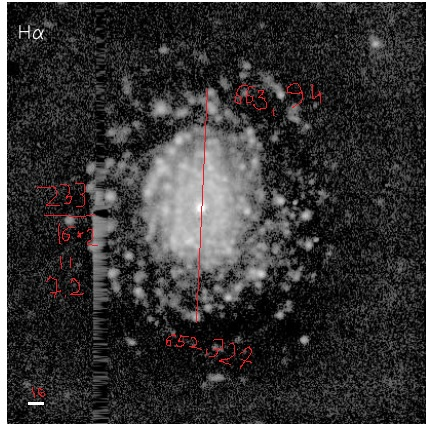

In [87]:
Image('ngc2985_Halpha_dist.jpg')

XDSS и $H_{alpha}$ из http://adsabs.harvard.edu/cgi-bin/bib_query?2008MNRAS.390..466E (расстояние 21.1 Мпк)

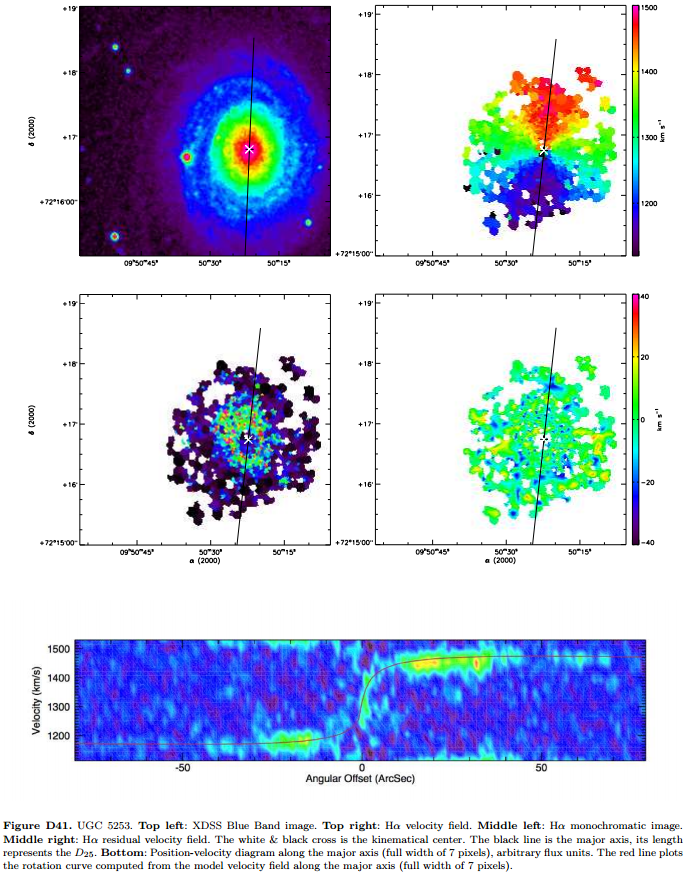

In [88]:
Image('halpha_xdss_u5253.png')

На кривой вращения видно, что светятся области 15-30 и 10-45+(до 70).

И кривая вращения из той же работы что и выше (обзор GHASP):

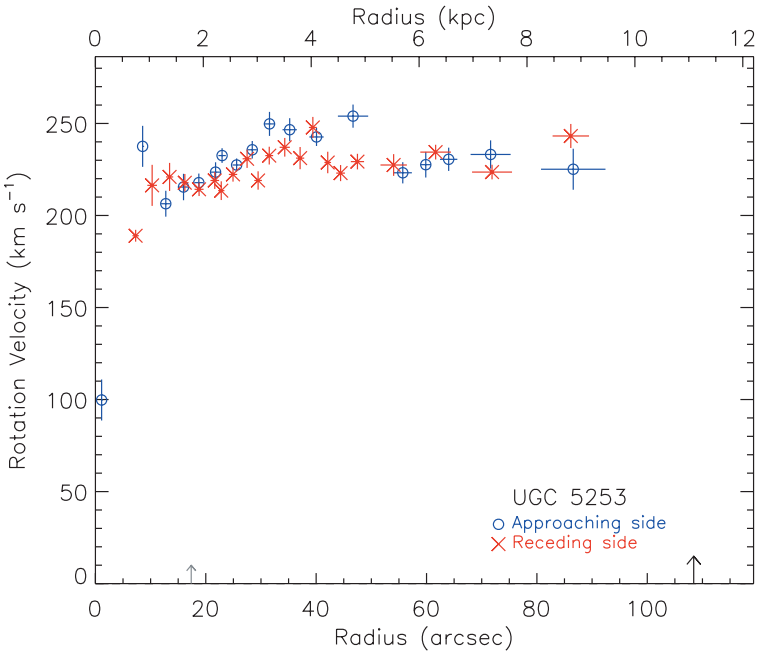

In [89]:
Image('ghasp_2008_halpha_vel.png')

(0, 200)

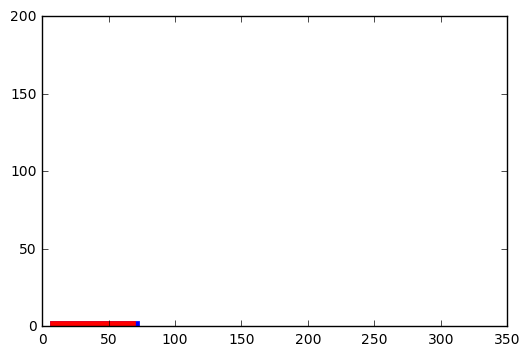

In [90]:
def plot_SF(ax):
    ax.plot([10., 70.], [0., 0.], '-', lw=7., color='b')
#     ax.plot([10., 7.2/scale], [0., 0.], '-', lw=7., color='red')
    ax.plot([10., 7.2/(scale*22.4/19.)], [0., 0.], '-', lw=7., color='r') #TODO: исправить менее грубо
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

Согласуются примерно данные (хотя по яркости кривой вращения в Halpha так и не скажешь).

Изображение из AINUR: Atlas of Images of NUclear Rings (DSS изображение из http://adsabs.harvard.edu/cgi-bin/bib_query?2010MNRAS.402.2462C)- но это самый центр, не нужно

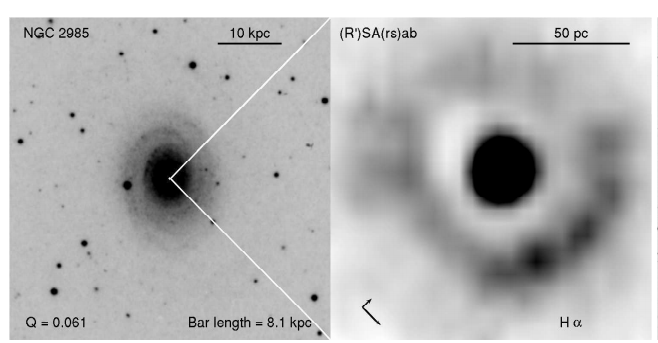

In [91]:
Image('AINUR_image.png')

## Неустойчивость

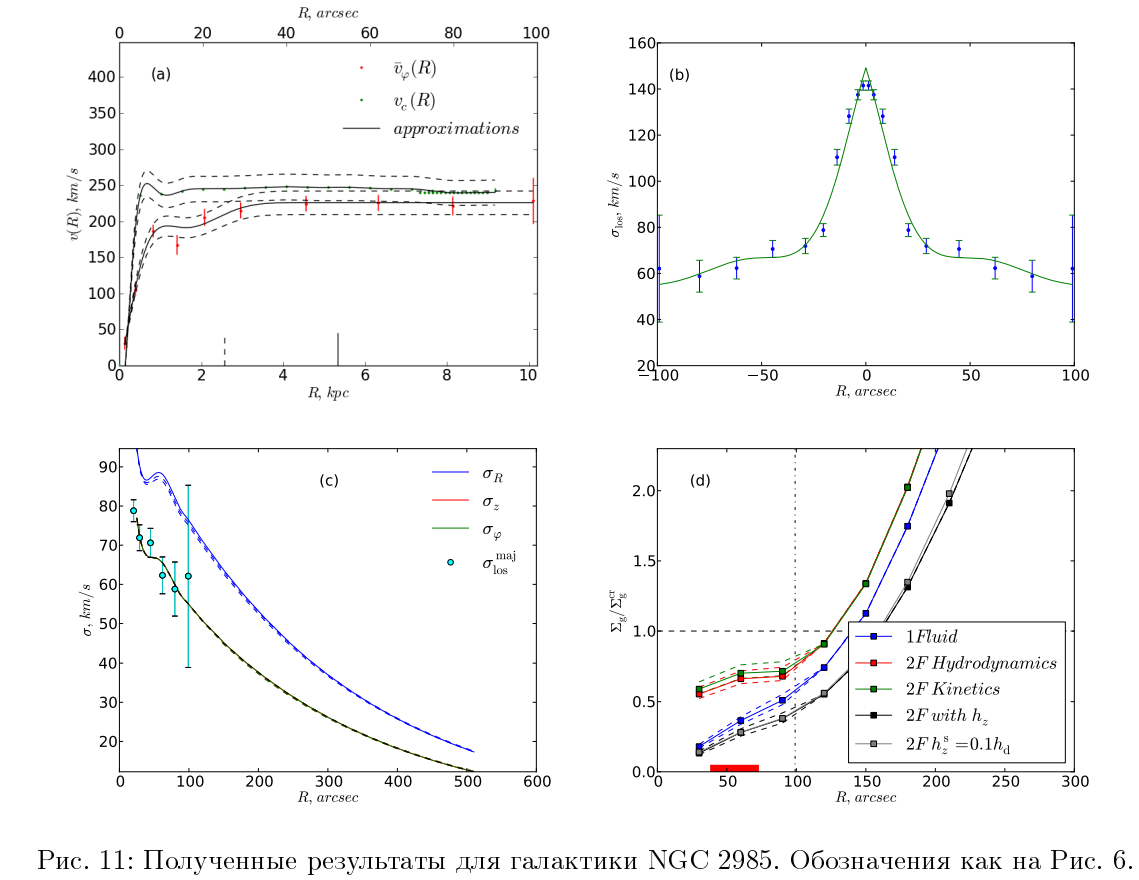

In [92]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [93]:
sound_vel = 6  #скорость звука в газе, км/с
data_lim = min(max(r_sig_ma), max(r_wsrt)) #где заканчиваются данные

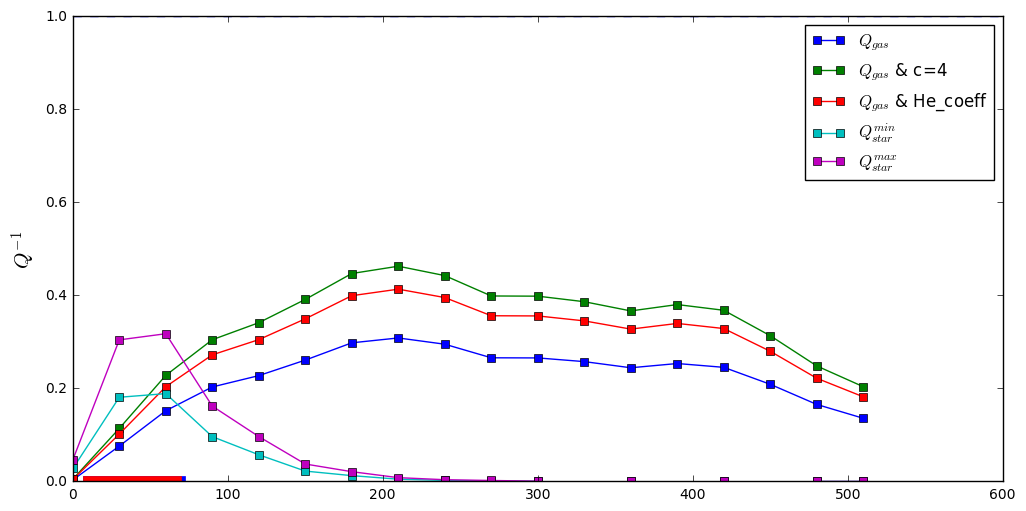

In [94]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=He_coeff*l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & He_coeff')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mudK, h=hK) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens),  
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mudK, h=hK) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15);

Значения одножидкостного похожи на диплом (без 1.6).

**НЕ ИСПРАВЛЕНО ЗА 1.6!** И не должно быть.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

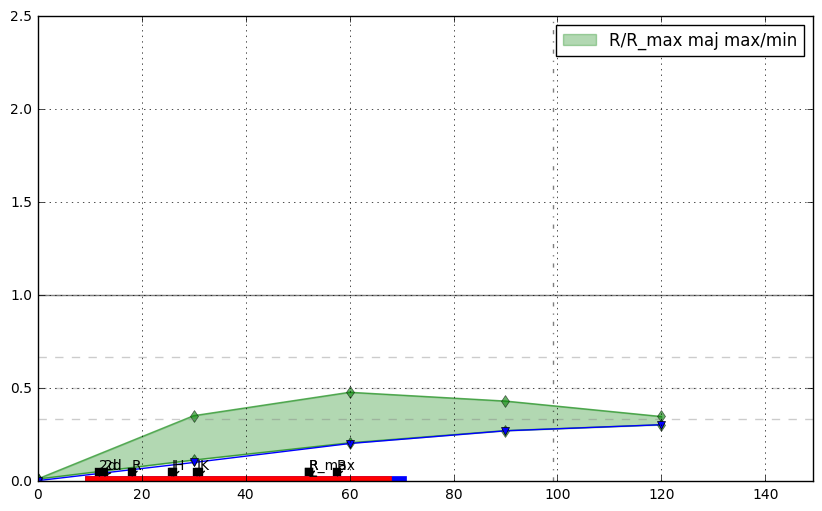

In [95]:
total_gas_data = zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[:5]
disk_scales = []
for l in all_photometry:
    try:
        disk_scales.append((l[5][0], l[0].split(' ')[1])) #внутренний диск только
    except TypeError:
        disk_scales.append((l[5], l[0].split(' ')[1])) 

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 6., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu_in, h=h_in), M_to_L_R, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R/R_max maj max/min')


plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

# End

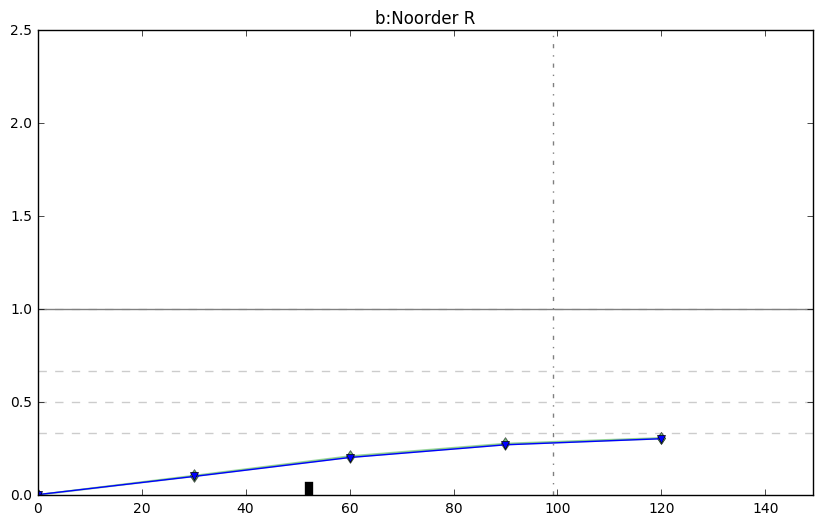

In [96]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=tot_dens(all_photometry[i][-1]), 
              star_density_min=tot_dens(all_photometry[i][-1]),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [97]:
anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=1)

In [98]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Самый максимальный диск

Существует ограничение на максимальный диск в ~0.85 (изотермическое гало) и на субмаксимальный в 0.55-0.6 (NFW гало). Попробуем дотянуть фотметрию до максимальных дисков и посмотрим, как изменятся M/L (скорость зависит как корень из M/L):

b:Noorder R    : M/L was 0.81 and for max it equal 12.08, for submax equal 6.02
b:Noorder B    : M/L was 0.53 and for max it equal 8.18, for submax equal 4.08
b:Mendez-Abreu J: M/L was 0.76 and for max it equal 2.80, for submax equal 1.40
Gutierrez R 2d : M/L was 0.75 and for max it equal 2.48, for submax equal 1.24
Heidt J        : M/L was 0.76 and for max it equal 2.03, for submax equal 1.01
Heidt K        : M/L was 0.65 and for max it equal 1.42, for submax equal 0.71
Heidt H        : M/L was 0.70 and for max it equal 1.55, for submax equal 0.77
S4G 2d         : M/L was 0.67 and for max it equal 1.35, for submax equal 0.67
S4G_AM 2d      : M/L was 0.67 and for max it equal 1.18, for submax equal 0.59
Noorder R_max  : M/L was 6.00 and for max it equal 12.08, for submax equal 6.02


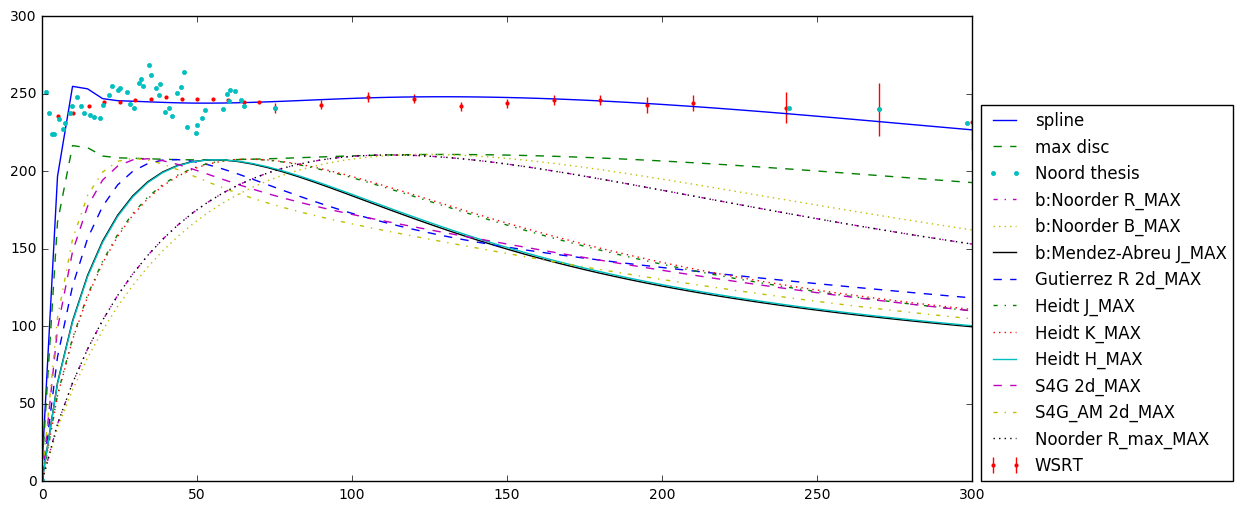

In [99]:
fig = plt.figure(figsize=[12,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')
plt.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc')
# plt.plot(test_points, 0.6*spl_gas(test_points), '--', label='submax disc')
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(r, vel, '.', label = 'Noord thesis')

max_coeffs = {}

for ind, photom in enumerate(all_photometry):
    if type(photom[5]) == tuple:
        disc_v = lambda l: disc_vel(l, photom[7][0](0), photom[5][0], scale, Sigma0_2=photom[7][1](0), h_2=photom[5][1])
    else:
        disc_v = lambda l: disc_vel(l, photom[7](0), photom[5], scale)
        
    values = map(disc_v, test_points)
    disc_max = test_points[values.index(max(values))]
        
    max_coeff = 0.85*spl_gas(disc_max)/disc_v(disc_max)
    submax_coeff = 0.6*spl_gas(disc_max)/disc_v(disc_max)
    
    if type(photom[5]) == tuple:
        plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 *photom[7][0](0), photom[5][0], scale, 
                                                     Sigma0_2=max_coeff**2 *photom[7][1](0), h_2=photom[5][1]), test_points), next(linecycler), label=photom[0] + '_MAX')
    else:
        plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0] + '_MAX')
    
    print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
    max_coeffs[photom[0]] = [max_coeff**2, submax_coeff**2]


plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(loc=(1.01, 0.));

Для R многовато, остальные более-менее. Видно, что по сути разбивается на две группы - Ноордермеер vs все остальные.

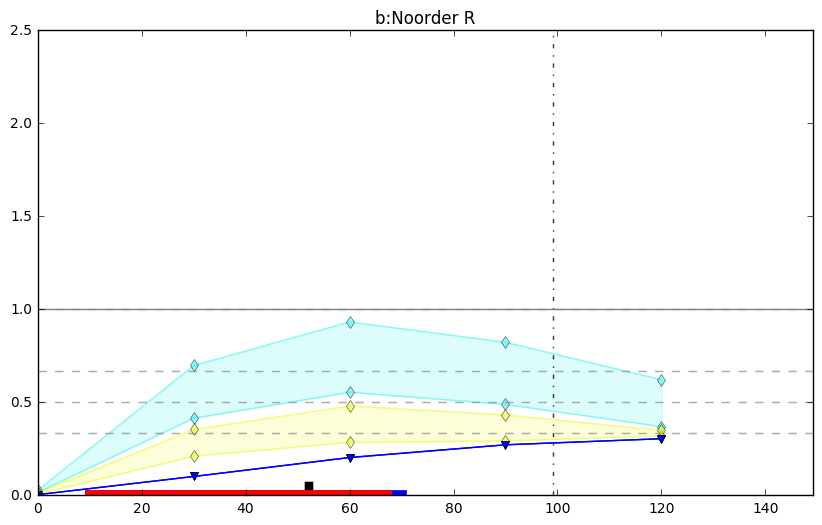

In [100]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*tot_dens(all_photometry[i][-1])(l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*tot_dens(all_photometry[i][-1])(l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*tot_dens(all_photometry[i][-1])(l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*tot_dens(all_photometry[i][-1])(l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    plot_SF(ax)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [101]:
anim.save('..\\..\pics\\'+name+'_MAXDISCS.gif', writer='imagemagick', fps=1)

In [102]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Оценки с молекулярным диском

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


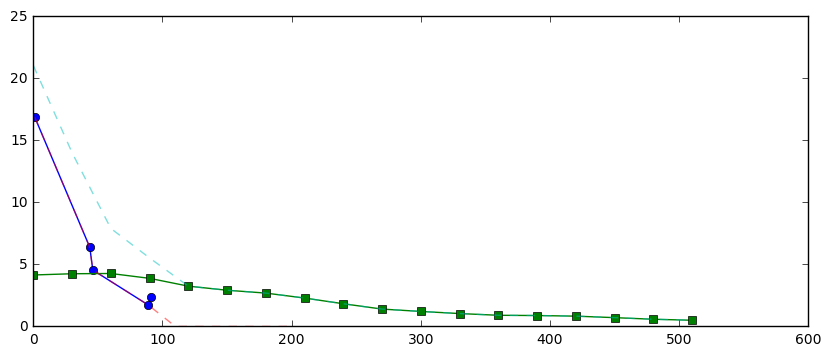

In [103]:
import scipy.interpolate

fig = plt.figure(figsize=[10, 4])

y_interp = scipy.interpolate.interp1d(list(r_H2_dens)[:-1] + [110.], list(H2_dens)[:-1] + [0.0])

def y_interp_(r):
    if r < min(r_H2_dens):
        return y_interp(min(r_H2_dens))
    elif r < 110:
        return y_interp(r)
    else:
        return 0.

points = np.linspace(1.2, 200., 100.)

plt.plot(r_H2_dens, H2_dens, 'o-')
plt.plot(r_g_dens, gas_dens, 's-')

plt.plot(points, map(y_interp_, points),  '--', alpha=0.5)
plt.plot(r_g_dens, map(lambda l: y_interp_(l[0]) + l[1], zip(r_g_dens, gas_dens)),  '--', alpha=0.5);

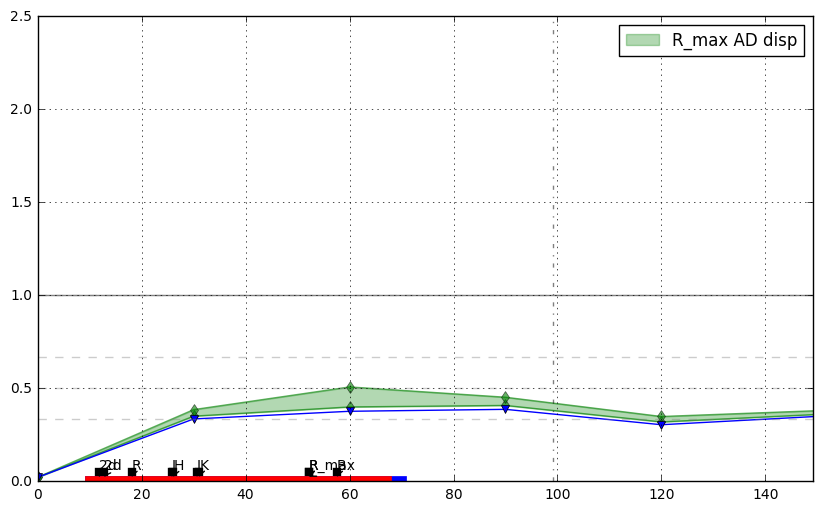

In [104]:
fig = plt.figure(figsize=[10, 6])

total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0]) + l[1]) for l in zip(r_g_dens, gas_dens)])[:6]

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min,
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 6., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 6., 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R_max AD disp')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Стало более полого, но все еще недостаточно.

Для максимальных дисков:

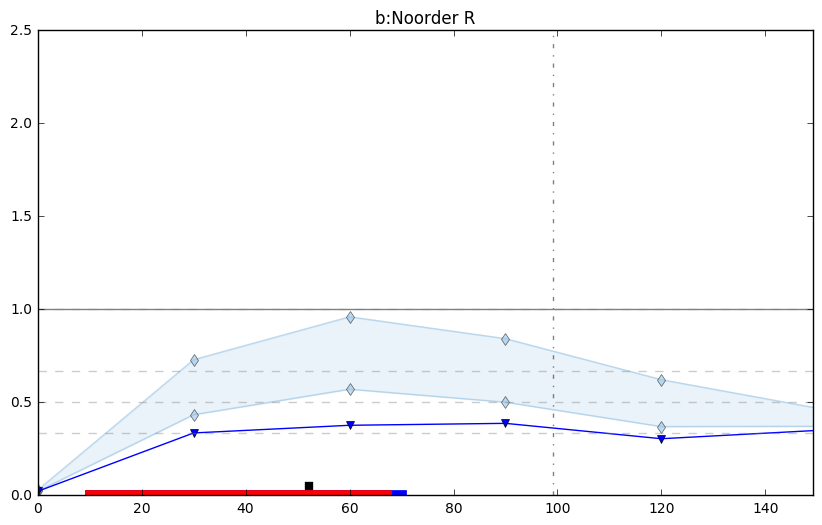

In [105]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*tot_dens(all_photometry[i][-1])(l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*tot_dens(all_photometry[i][-1])(l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
        
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    plot_SF(ax)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [106]:
anim.save('..\\..\pics\\'+name+'_MAXDISCS_all_gas.gif', writer='imagemagick', fps=1)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [107]:
from IPython.display import HTML
HTML(anim.to_html5_video())

Видно, что в смысле звездообразования лучше всего фотометрия Heidt подходит.

### Картинка 

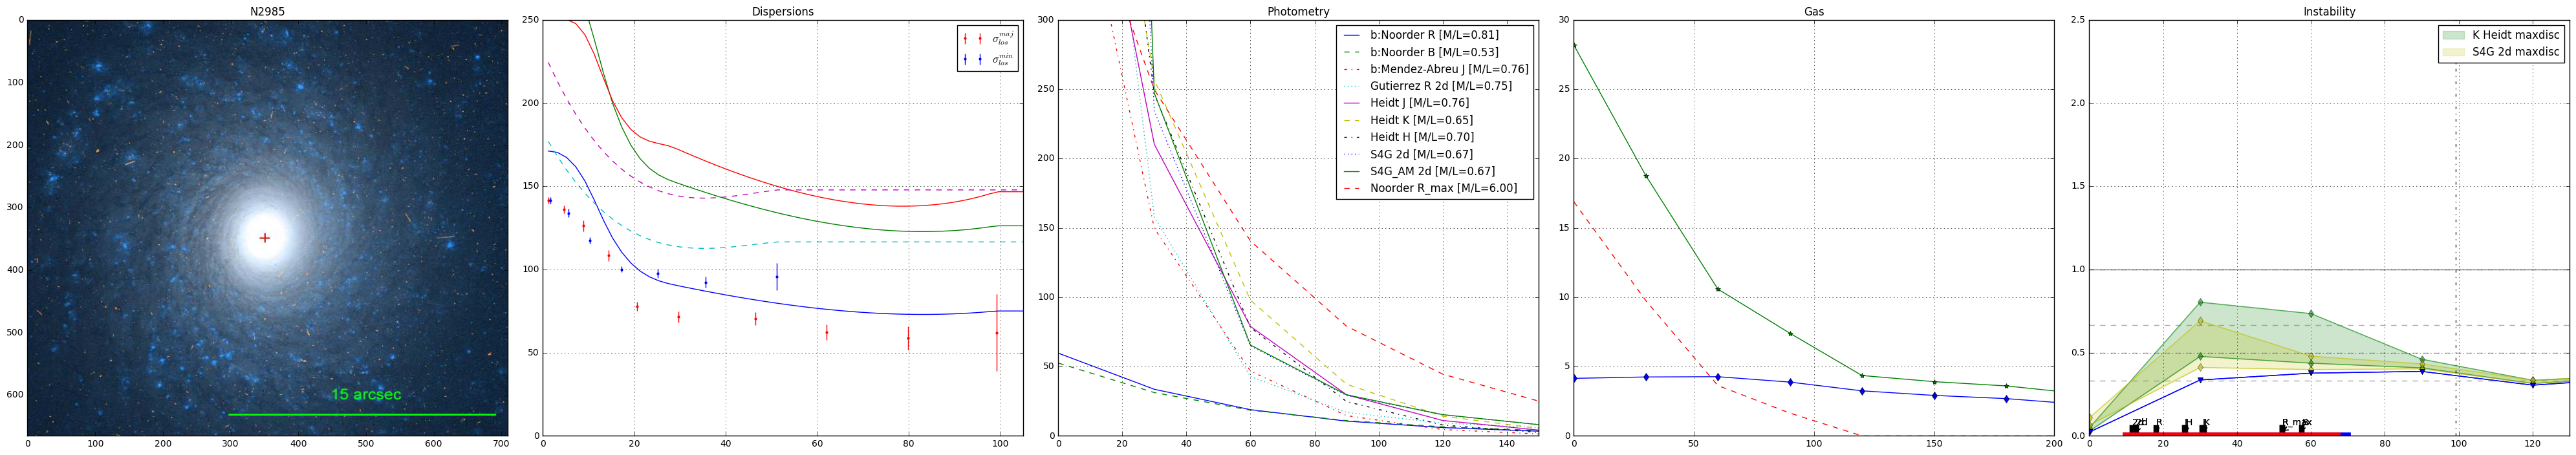

In [108]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('HST_color_dist.jpg'), aspect='auto', cmap='Greys')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='b', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(tot_dens(photom[-1]), r_g_dens), next(linecycler), label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(r_g_dens, [He_coeff*(y_interp_(l[0]) + l[1]) for l in zip(r_g_dens, gas_dens)], '*-')
    axes[3].plot(r_g_dens, [y_interp_(l) for l in r_g_dens], '--')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    plot_2f_vs_1f(ax=axes[4], total_gas_data=total_gas_data_, 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mudK, h=hK), M_to_L=1.42, band='K'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mudK, h=hK), M_to_L=1.42, band='K'), 
                  data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='K Heidt maxdisc')
    
    plot_2f_vs_1f(ax=axes[4], total_gas_data=total_gas_data_, 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: tot_dens((lambda l1: s4g_surf_density(mu_disc(l1, mu0=mu0d_s4g, h=h_disc_s4g), 1.35),
                       lambda l2: s4g_surf_density(mu_disc(l2, mu0=mu0d_s4g_2, h=h_disc_s4g_2), 1.35)))(l), 
                  star_density_min=lambda l: tot_dens((lambda l1: s4g_surf_density(mu_disc(l1, mu0=mu0d_s4g, h=h_disc_s4g), 1.35),
                       lambda l2: s4g_surf_density(mu_disc(l2, mu0=mu0d_s4g_2, h=h_disc_s4g_2), 1.35)))(l), 
                  data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales, label='S4G 2d maxdisc')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
       
#     plt.savefig(path+name+'.png', format='png', bbox_inches='tight');
    
save_model_plot(summary_imgs_path)